## Exploratory Data Analysis and Visualisation

After data cleaning, Exploratory Data Analysis (EDA) and Visualisation are conducted to: 

1. **Understand the data**: EDA helps to provide a comprehensive understanding of the data, including its structure, patterns, and relationships. 

2. **Identify patterns and relationships**: it can also help to identify patterns and relationships between variables that may not be immediately apparent. This can help to generate hypotheses and guide further analysis. Most importantly, it enables us to identify good predictor variables for subsequent model building.

3. **Communicate insights**: Visualisation techniques can help to communicate data insights and present findings a clear and understandable way. This can help to facilitate decision-making and drive subsequent modeling action based on the data.

4. **Select appropriate models**: EDA and visualisation can help to identify which statistical models or machine learning algorithms may be appropriate for the data. This can help to ensure that the analysis is appropriate and accurate.

5. **Validate assumptions**: EDA and visualisation can help to validate assumptions about the data, such as those identified in our secondary research ealier. This can help to ensure that the analysis is appropriate and accurate.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#Import cleaned dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       67136 non-null  float64
 1   HighBP                67136 non-null  int64  
 2   HighChol              67136 non-null  float64
 3   CholCheck             67136 non-null  int64  
 4   BMI                   67136 non-null  float64
 5   Smoker                67136 non-null  float64
 6   Stroke                67136 non-null  float64
 7   HeartDiseaseorAttack  67136 non-null  float64
 8   PhysActivity          67136 non-null  int64  
 9   Fruits                67136 non-null  int64  
 10  Veggies               67136 non-null  int64  
 11  HvyAlcoholConsump     67136 non-null  int64  
 12  AnyHealthcare         67136 non-null  int64  
 13  NoDocbcCost           67136 non-null  float64
 14  GenHlth               67136 non-null  float64
 15  MentHlth           

### Understand the Dataset

- Response variable: `Diabetes_binary`


- Numeric variables include:
    1. `BMI`
    2. `MentHlth`
    3. `PhysHlth`

- Categorical variables include:
    1. `HighBP`
    2. `HighChol`
    3. `CholCheck`
    4. `Smoker`
    5. `Stroke`
    6. `HeartDiseaseorAttack`
    7. `PhysActivity`
    8. `Fruits`
    9. `Veggies`
    10. `HvyAlcoholConsump`
    11. `AnyHealthcare`
    12. `NoDocbcCost`
    13. `GenHlth`
    14. `DiffWalk`
    15. `Sex`
    16. `Age`
    17. `Education`
    18. `Income`

### Data Analysis and Visualisation: Response Variable

In [4]:
#rename the reponse variable column to "Diabetes" to make it more intuitive
diabetes.rename(columns={"Diabetes_binary": "Diabetes"}, inplace=True) 
diabetes['Diabetes'].value_counts()

Diabetes
0.0    33568
1.0    33568
Name: count, dtype: int64

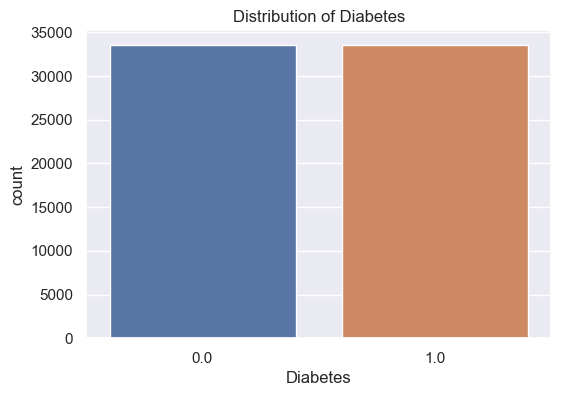

In [5]:
#Visualise the distribution of Diabetes (split 50-50)
plt.figure(figsize=(6, 4))
ax = sb.countplot(x = "Diabetes", data = diabetes)
plt.title("Distribution of Diabetes")
plt.show()

### Data Analysis and Visualisation: Numeric Variable

In [6]:
#Extract numeric variables
diabetes_numeric = diabetes[['BMI','MentHlth','PhysHlth']]

In [7]:
diabetes_numeric.describe()

,BMI,MentHlth,PhysHlth
count,67136.000000,67136.000000,67136.000000
mean,30.288340,4.230845,5.136752
std,7.095737,8.323138,9.593837
min,12.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000
50%,29.000000,0.000000,0.000000
75%,34.000000,4.000000,5.000000
max,99.000000,30.000000,30.000000


**Uni-variate Visualisation**
- After computing the statistical summary, now we would like to plot graphs for individual numeric variables. This allows us to convert complex statistical information in a simple, easy-to-understand format. 
- By presenting data visually, it can be easier for us to grasp key insights and take action based on the data.

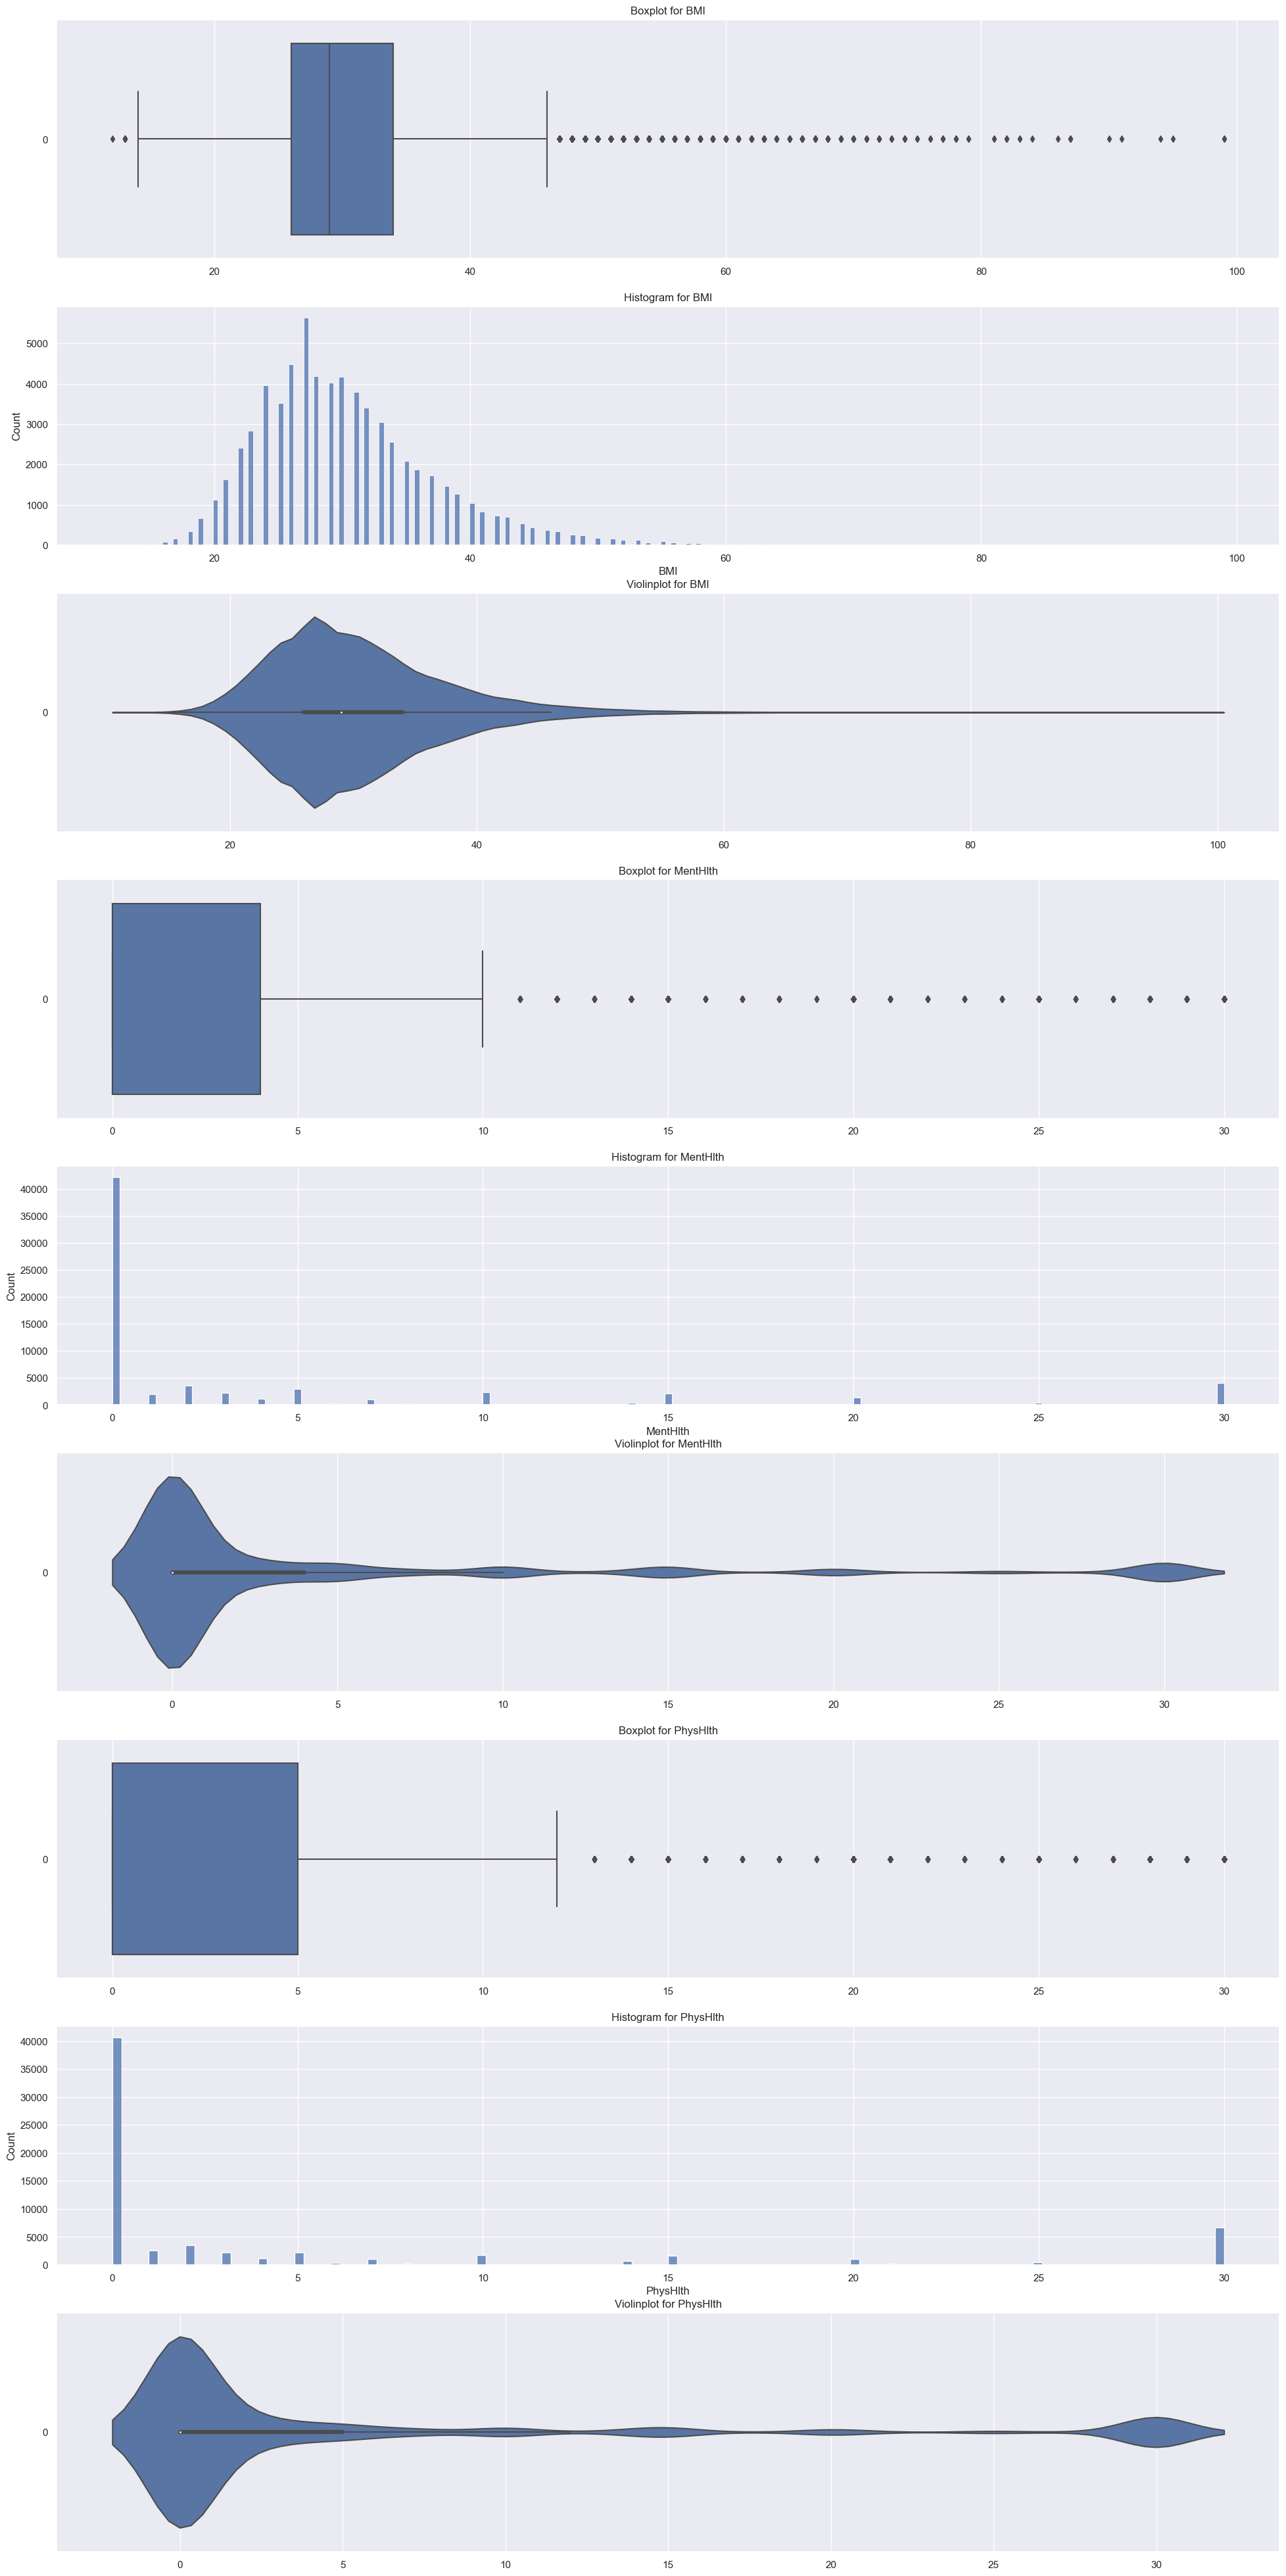

In [8]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(9, 1, figsize=(24, 50)) 

# Plot the basic uni-variate figures for each numeric variable
numeric_vars = ['BMI','MentHlth','PhysHlth']
count=0
for var in numeric_vars:
    boxplot = sb.boxplot(data = diabetes[var], orient = "h", ax = axes[count]).set(title=f'Boxplot for {var}')
    histplot = sb.histplot(data = diabetes[var], ax = axes[count+1]).set(title=f'Histogram for {var}')
    violinplot = sb.violinplot(data = diabetes[var], orient = "h", ax = axes[count+2]).set(title=f'Violinplot for {var}')    
    count+=3

#### Bi-variate Visualisation
- The next step involves identifying numeric variables that have strong relationships with the response variable, i.e., diabetes. To do so, we have utilized boxplot, with diabetes being the y-axis and numeric variable being the x-axis.

- Boxplots are a useful visualisation tool in identifying the relationship between independent numeric variables and a dependent categorical variable because they provide a graphical representation of the distribution of the numeric variable for each category of the categorical variable.

- Boxplots display the median, quartiles, and extreme values (outliers) of a numeric variable for each category of a categorical variable. This enables comparison of the distribution of the numeric variable across different categories of the categorical variable.

In [9]:
# Changing numeric values of Diabetes column to categorical 'yes'/'no' for Visualisation
diabetes["Diabetes"].replace(1, "Yes", inplace = True)
diabetes["Diabetes"].replace(0, "No", inplace = True)

[Text(0.5, 1.0, 'BMI'), Text(0.5, 0, 'BMI'), Text(0, 0.5, 'Diabetes')]

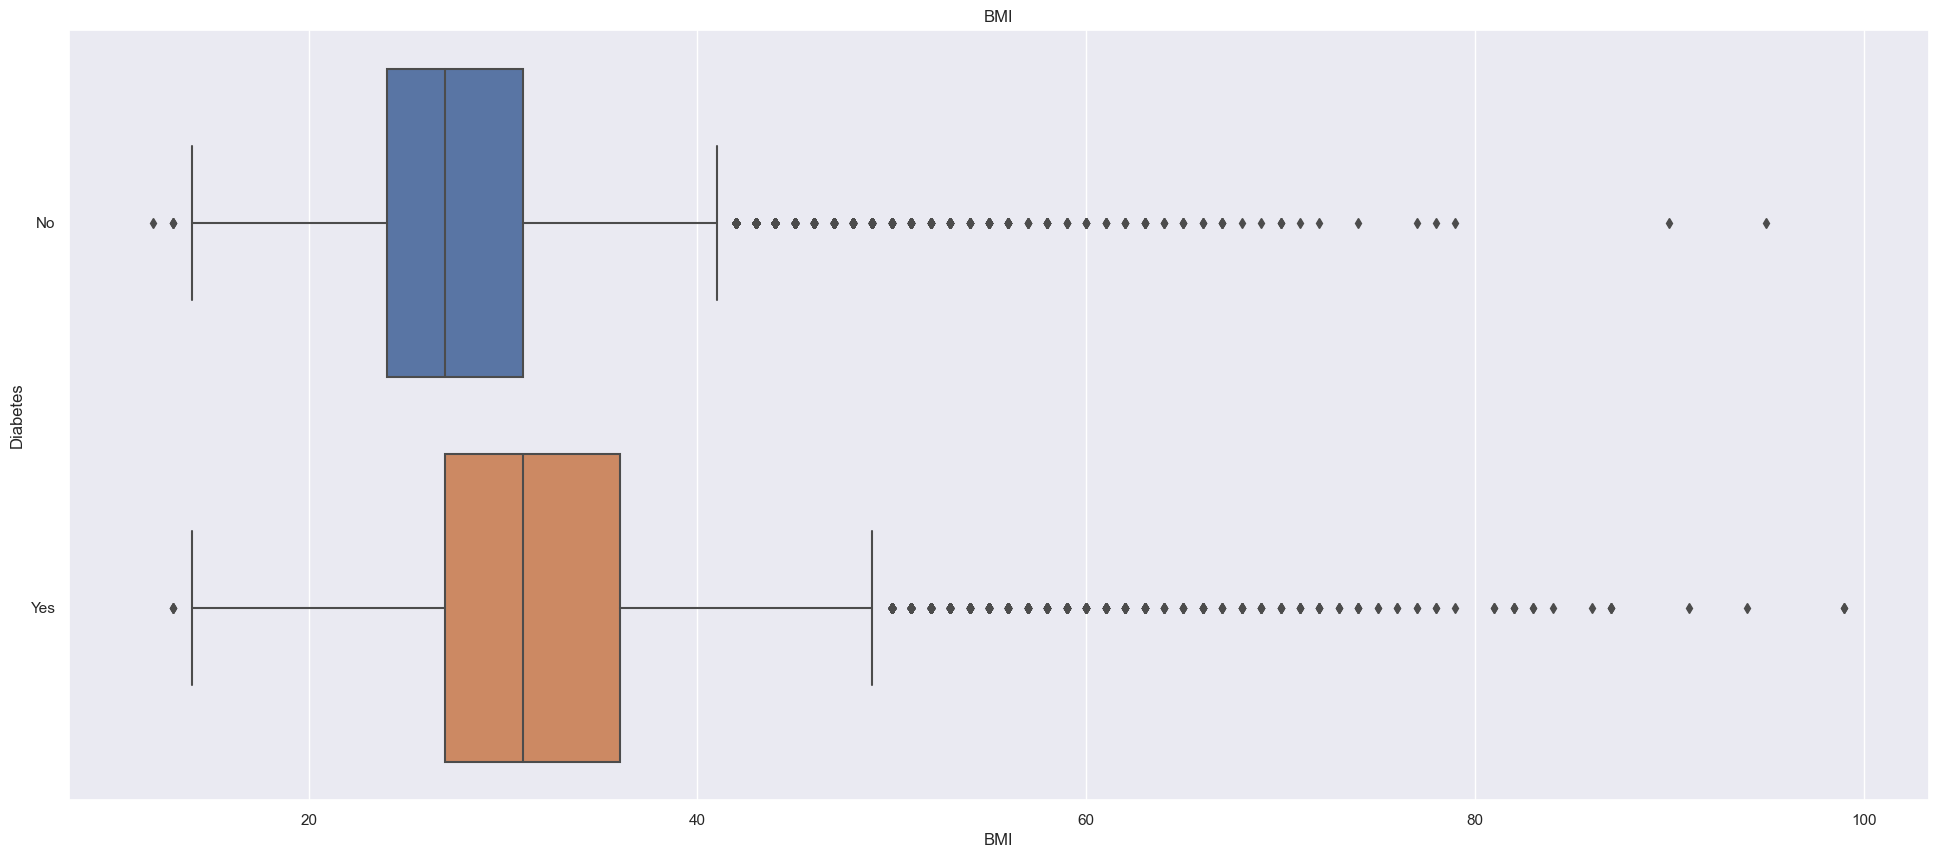

In [10]:
%matplotlib inline
f = plt.figure(figsize=(24,10))
sb.boxplot(x=diabetes["BMI"], y=diabetes["Diabetes"]).set(
    title="BMI", 
    xlabel='BMI',
    ylabel='Diabetes')

**Interpretation of the Plot**</br>
From the boxplot, it is evident that the distribution of `BMI` is different for different categories of `diabetes`. When `diabetes` is Yes, the median, first quartile and third quartile are higher than the distribution of diabetes is No. Thus, there is a strong relationship between BMI and diabetes.

[Text(0.5, 1.0, 'Number of Days Mental Health is Not Good'),
 Text(0.5, 0, 'MentHlth'),
 Text(0, 0.5, 'Diabetes')]

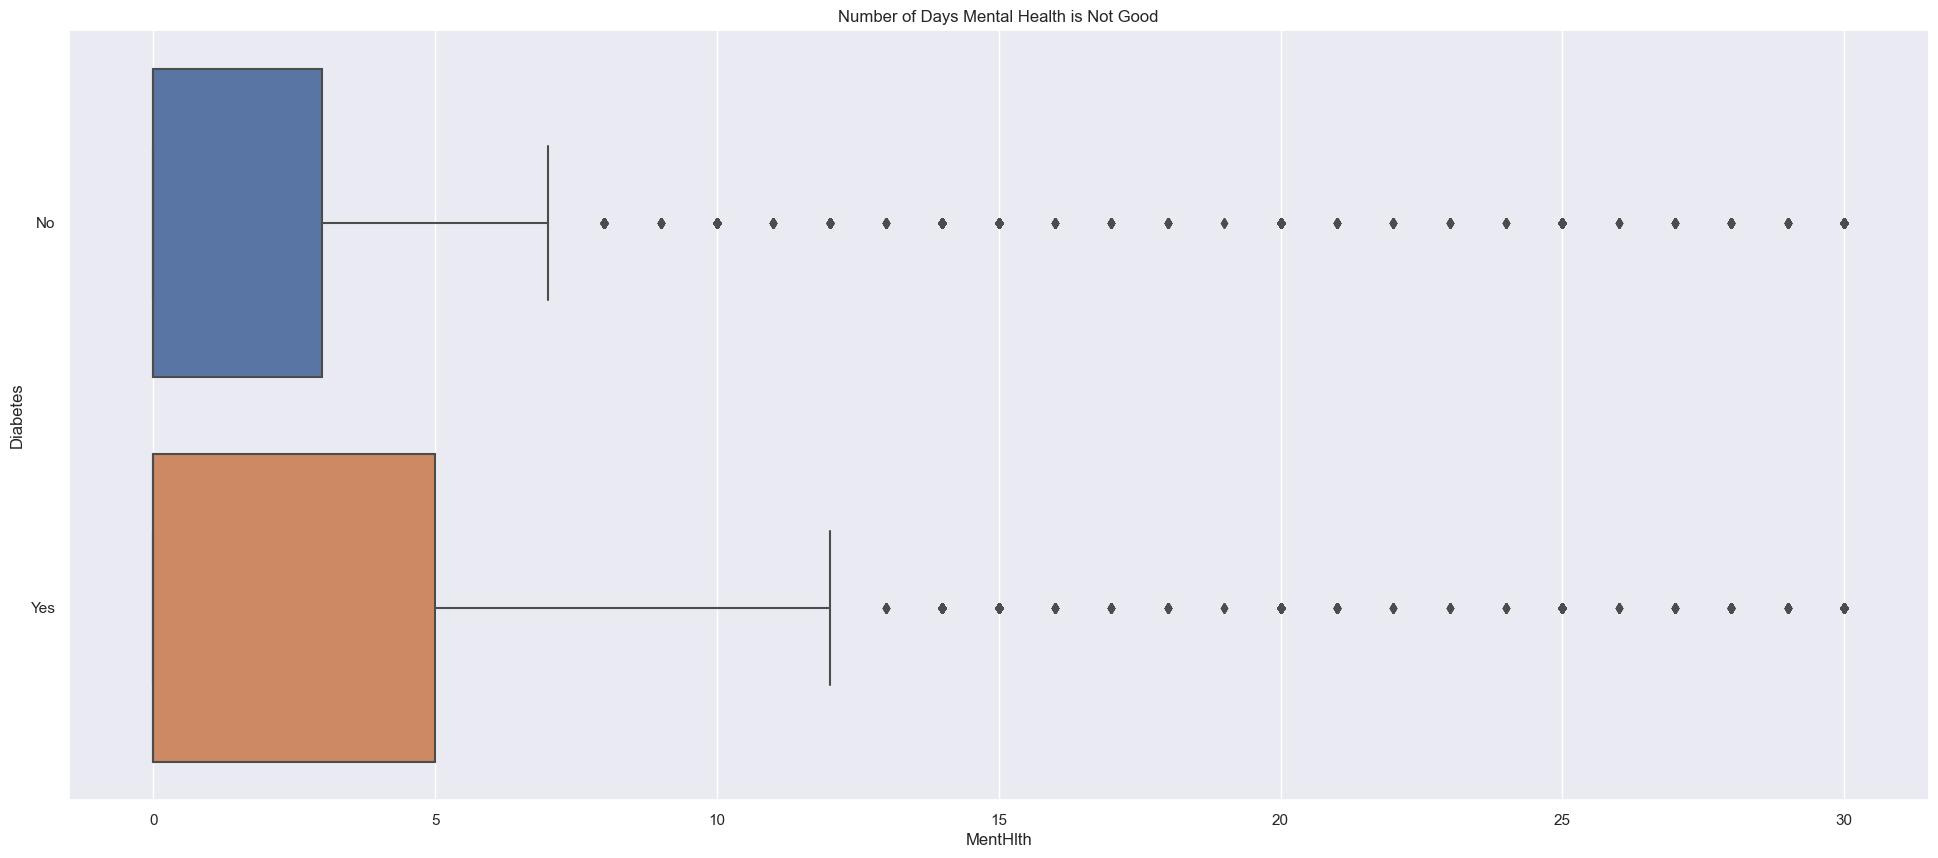

In [11]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=diabetes["MentHlth"], y=diabetes["Diabetes"]).set(
    title="Number of Days Mental Health is Not Good", 
    xlabel='MentHlth',
    ylabel='Diabetes')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `MentHlth` varies slightly for different categories of `diabetes`. When `diabetes` is yes, the third quartile and the upper limit of the distribution is higher. But in general, there is no strong relationship between mental health and diabetes.

[Text(0.5, 1.0, 'Number of Days Physical Health is Not Good'),
 Text(0.5, 0, 'PhysHlth'),
 Text(0, 0.5, 'Diabetes')]

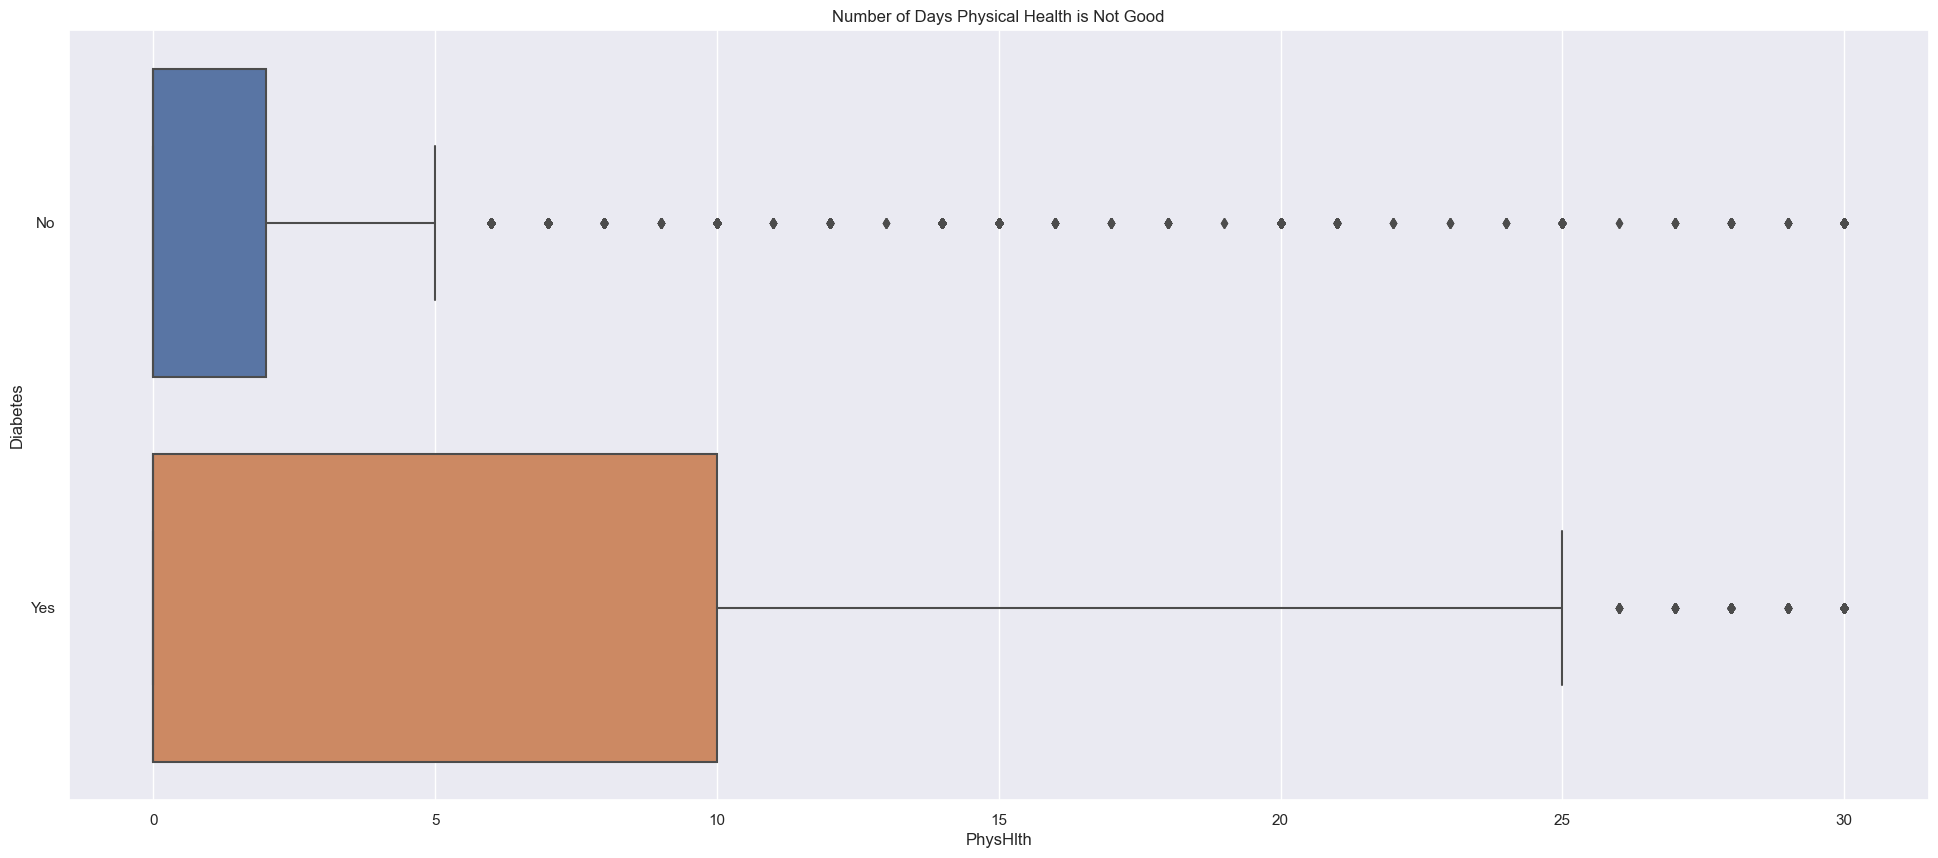

In [12]:
f = plt.figure(figsize=(24,10))
sb.boxplot(x=diabetes["PhysHlth"], y=diabetes["Diabetes"]).set(
    title="Number of Days Physical Health is Not Good", 
    xlabel='PhysHlth',
    ylabel='Diabetes')

**Interpretation of the Plot**</br>
From the boxplot, the distribution of `PhysHlth` varies for different categories of `diabetes`. When `diabetes` is yes, the third quatile and the upper limit of the distribution is significantly higher. Thus, we conclude that there is strong relationship between physical health and diabetes.

#### Summary of Findings
Based on the boxplots, the following numeric variables are identified to have close relationship with diabetes:
1. `BMI`
2. `PhysHlth`

Thus, they will be used as predictor variables for our machine learning models.

### Data Analysis and Visualisation: Categorical Variable

**Uni-variate Visualisation**
- To better visualise the distribution of individual categorical variable, a count plot is done on each variable. 
- Count plot is a useful visualisation tool for visualising a categorical variable because it provides a simple and intuitive way to display the distribution of observations within each category of the variable.
- It displays the count of observations in each category of a categorical variable as a bar graph. 

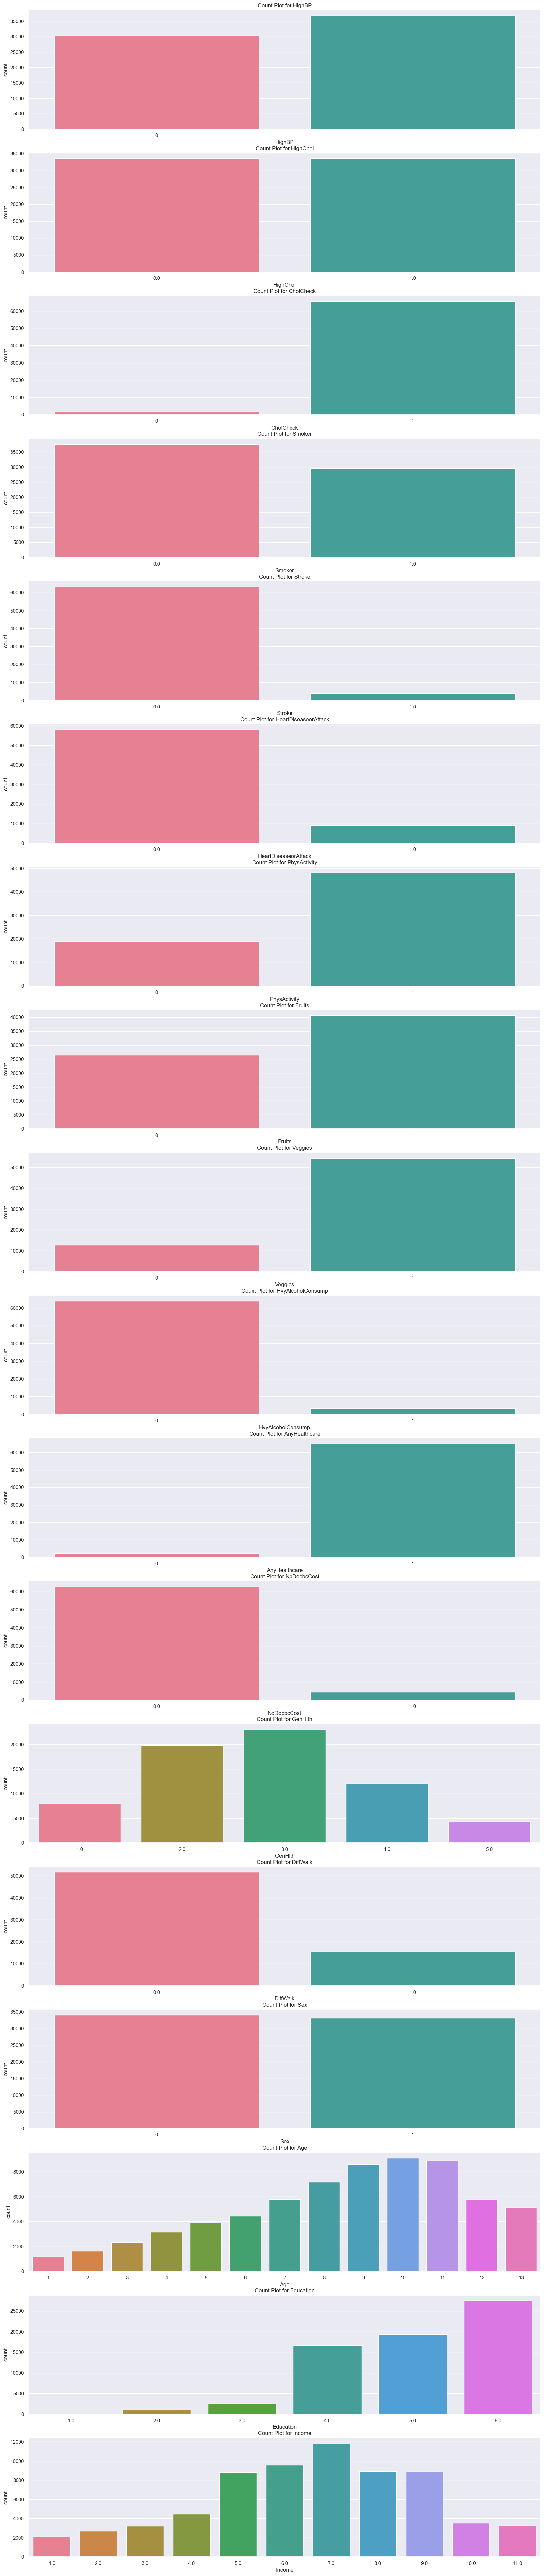

In [13]:
f, axes = plt.subplots(18, 1, figsize=(20, 100)) 
categorical_var = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','DiffWalk','Sex','Age','Education','Income']

count = 0
for var in categorical_var:
    sb.countplot(data = diabetes , x=var, palette='husl', ax=axes[count]).set(title=f'Count Plot for {var}')
    count+=1

#### Bi-variate Visualisation
- Besides numeric variables, we also need to identify categorical variables that have strong relationships with the response variable, i.e., diabetes. To do so, we would use catplots.

- Catplot is a useful visualisation tool in identifying the relationship between independent categorical variables and a dependent categorical variable, as they provide a clear visual representation of the distribution of the dependent variable across different categories of the independent variable, enabling comparison and identification of patterns or relationships.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'High Blood Pressure Awareness')

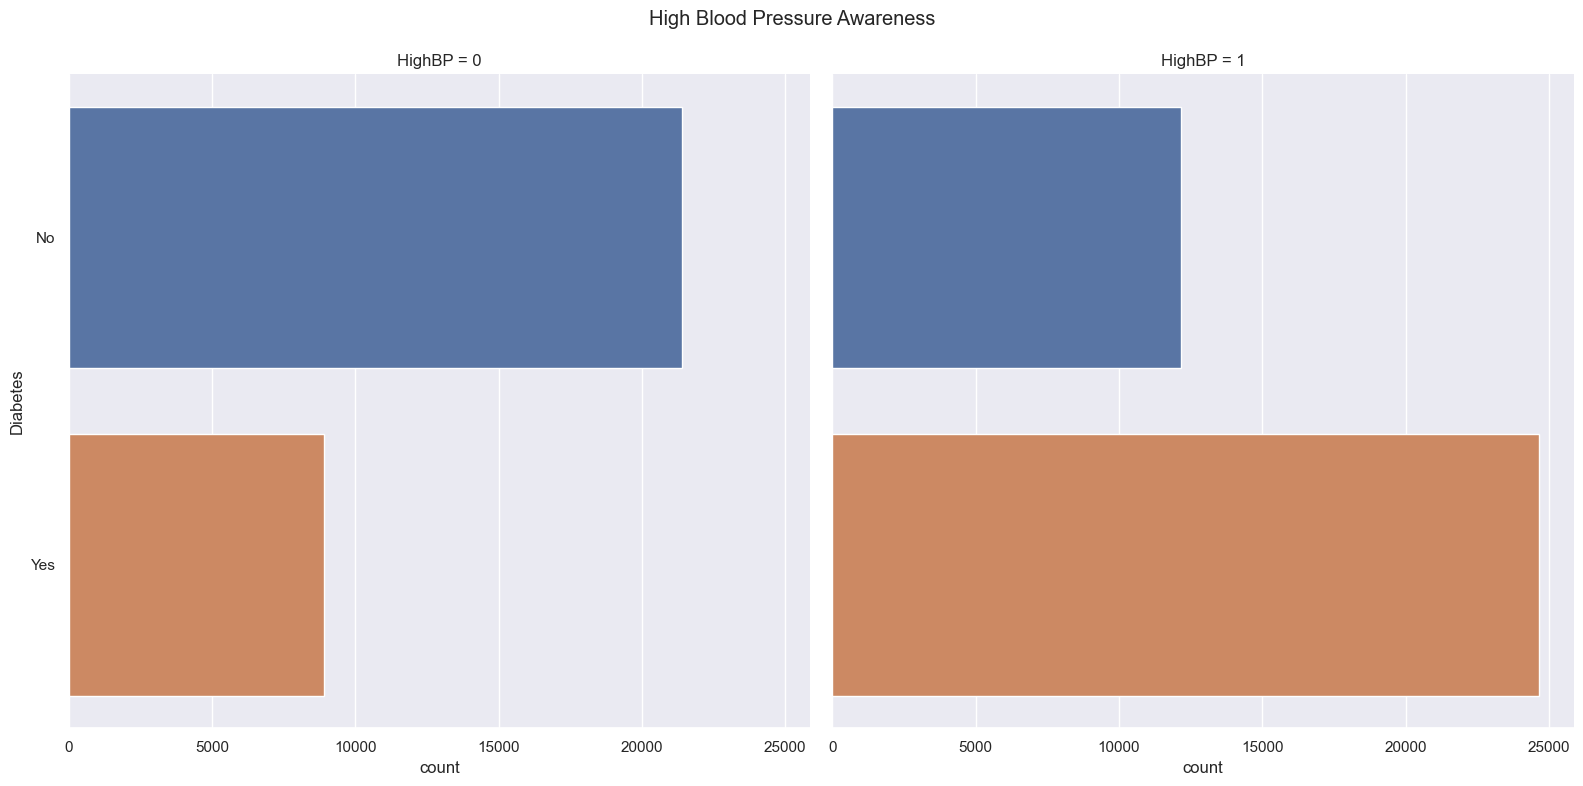

In [14]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'HighBP', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('High Blood Pressure Awareness')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `HighBP`. When `HighBP` is 1, there are more 'Yes' than 'No' for `diabetes`. But when `HighBP` is 0, there are more 'No' than 'Yes'. Thus, there is a strong relationship between High Blood Pressure Awareness and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Cholesterol Awareness')

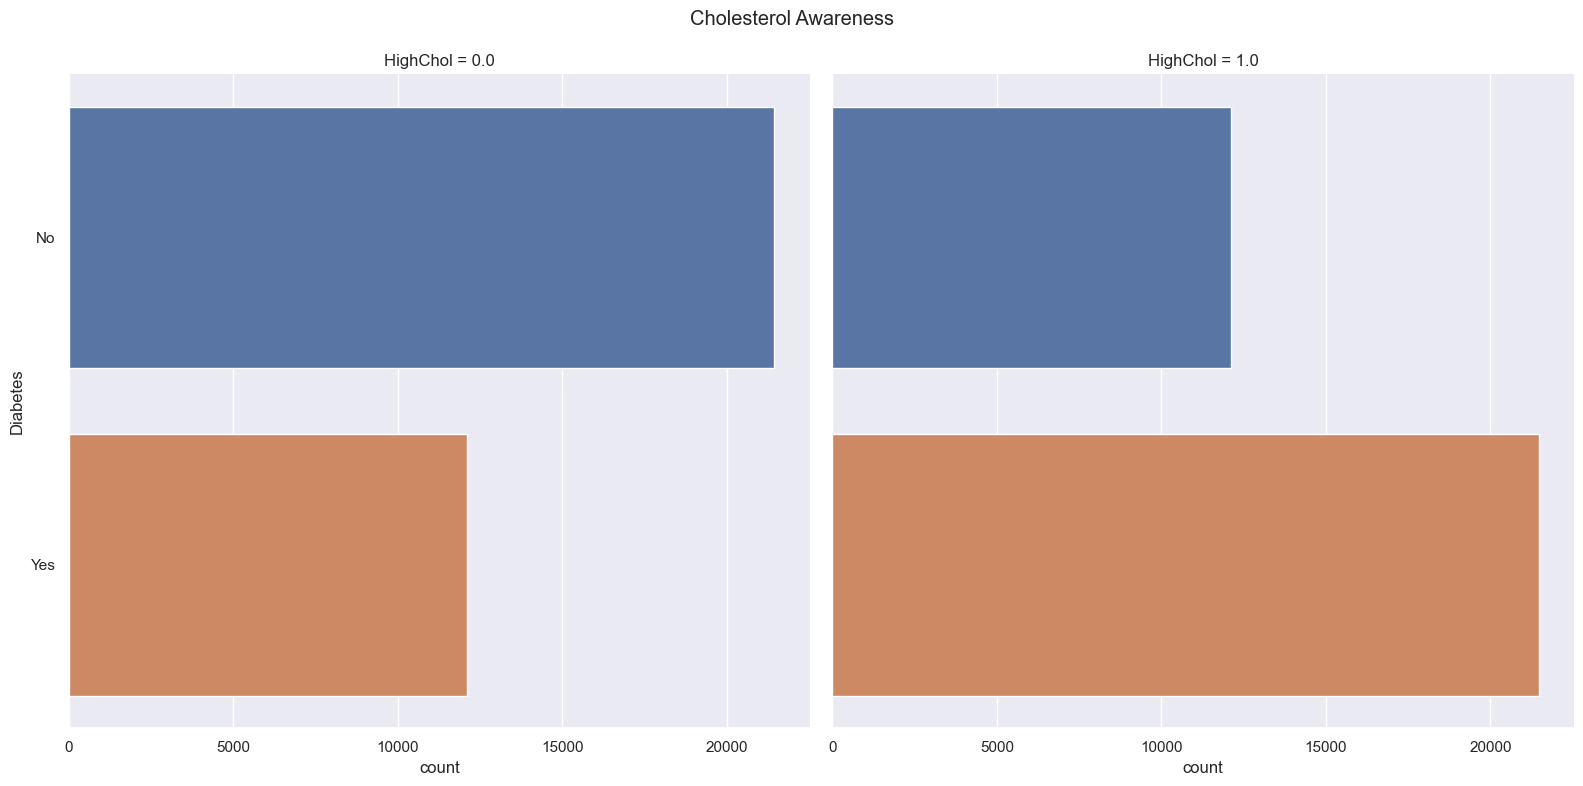

In [15]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'HighChol', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Cholesterol Awareness')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `HighChol`. When `HighChol` is 1, there are more 'Yes' than 'No' for `diabetes`. But when `HighChol` is 0, there are more 'No' than 'Yes'. Thus, there is a strong relationship between Cholesterol Awareness and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Cholesterol check within past five years')

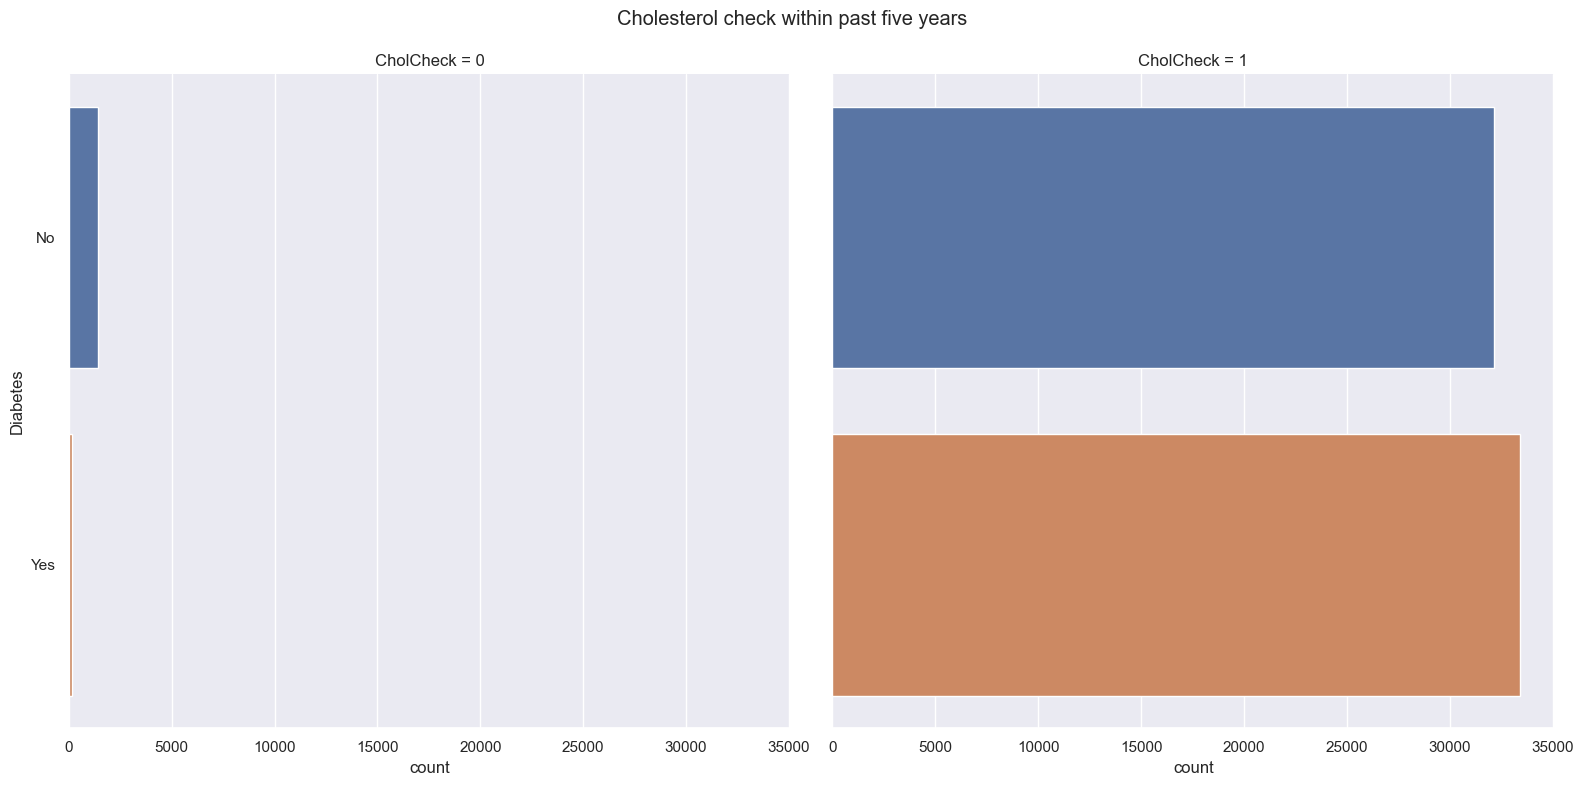

In [16]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'CholCheck', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Cholesterol check within past five years')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `diabetes` is similar for different categories of `CholCheck`. Thus, there is no close relationship between Cholesterol check within past five years and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Smoked at Least 100 Cigarettes')

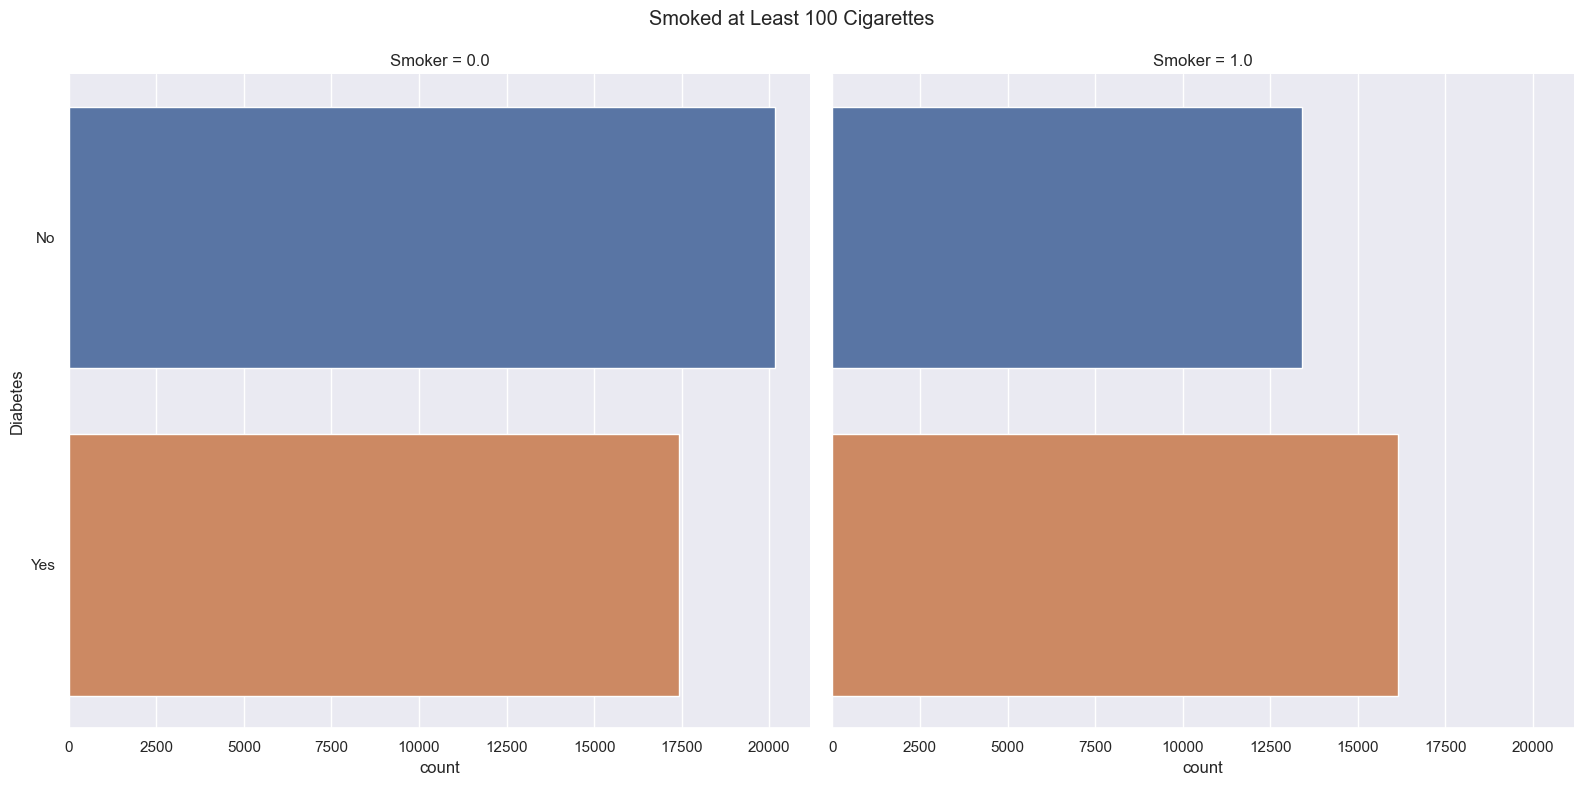

In [17]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'Smoker', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Smoked at Least 100 Cigarettes')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `Smoker`. When `Smoker` is 1, there are more 'Yes' than 'No' for `diabetes`. But when `Smoker` is 0, there are more 'No' than 'Yes'. Thus, there is a strong relationship between smokers and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Chronic Health Conditions')

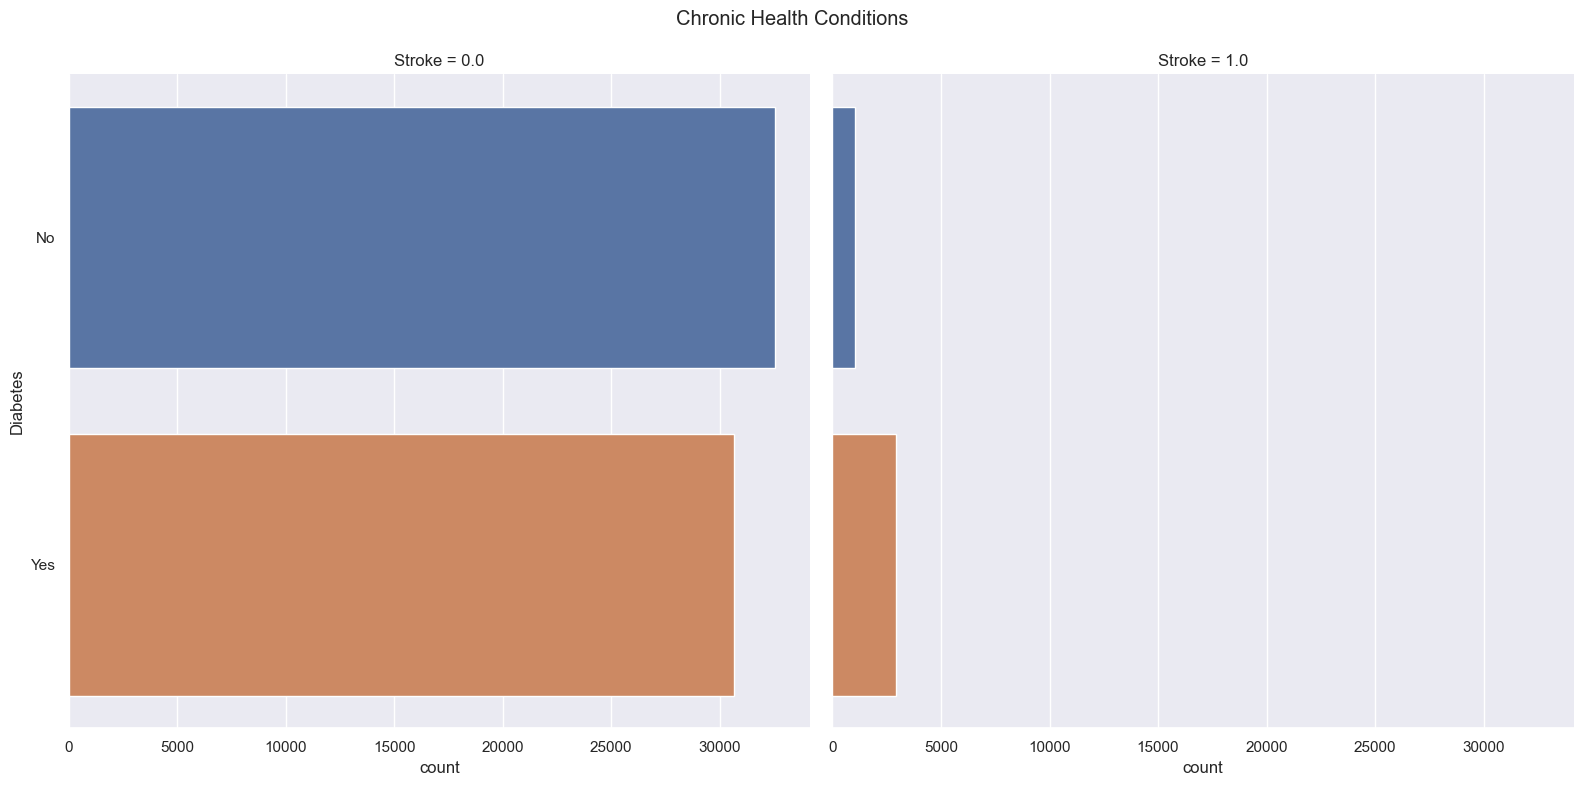

In [18]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'Stroke', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Chronic Health Conditions')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `diabetes` is similar for different categories of `Stroke`. Thus, there is no close relationship between Chronic Health Conditions and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Ever had CHD or MI (Coronary Heart Disease (CHD) and Myocardial Infarction (MI))')

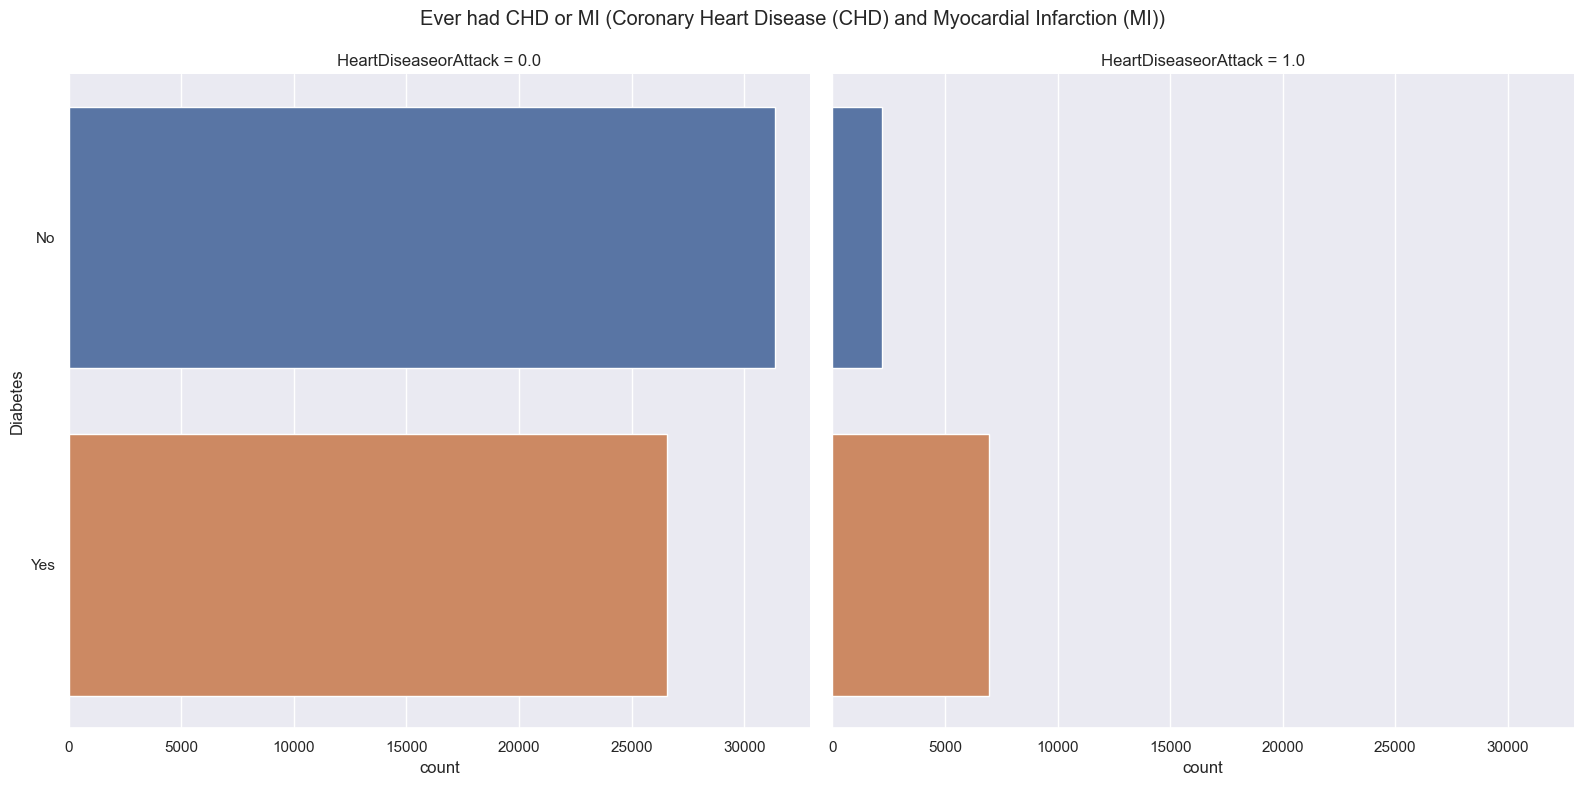

In [19]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'HeartDiseaseorAttack', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Ever had CHD or MI (Coronary Heart Disease (CHD) and Myocardial Infarction (MI))')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `HeartDiseaseorAttack`. When `HeartDiseaseorAttack` is 1, there are more 'Yes' than 'No' for `diabetes`. But when `HeartDiseaseorAttack` is 0, there are more 'No' than 'Yes'. Thus, there is a strong relationship between ever having CHD or MI and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Leisure Time Physical Activity')

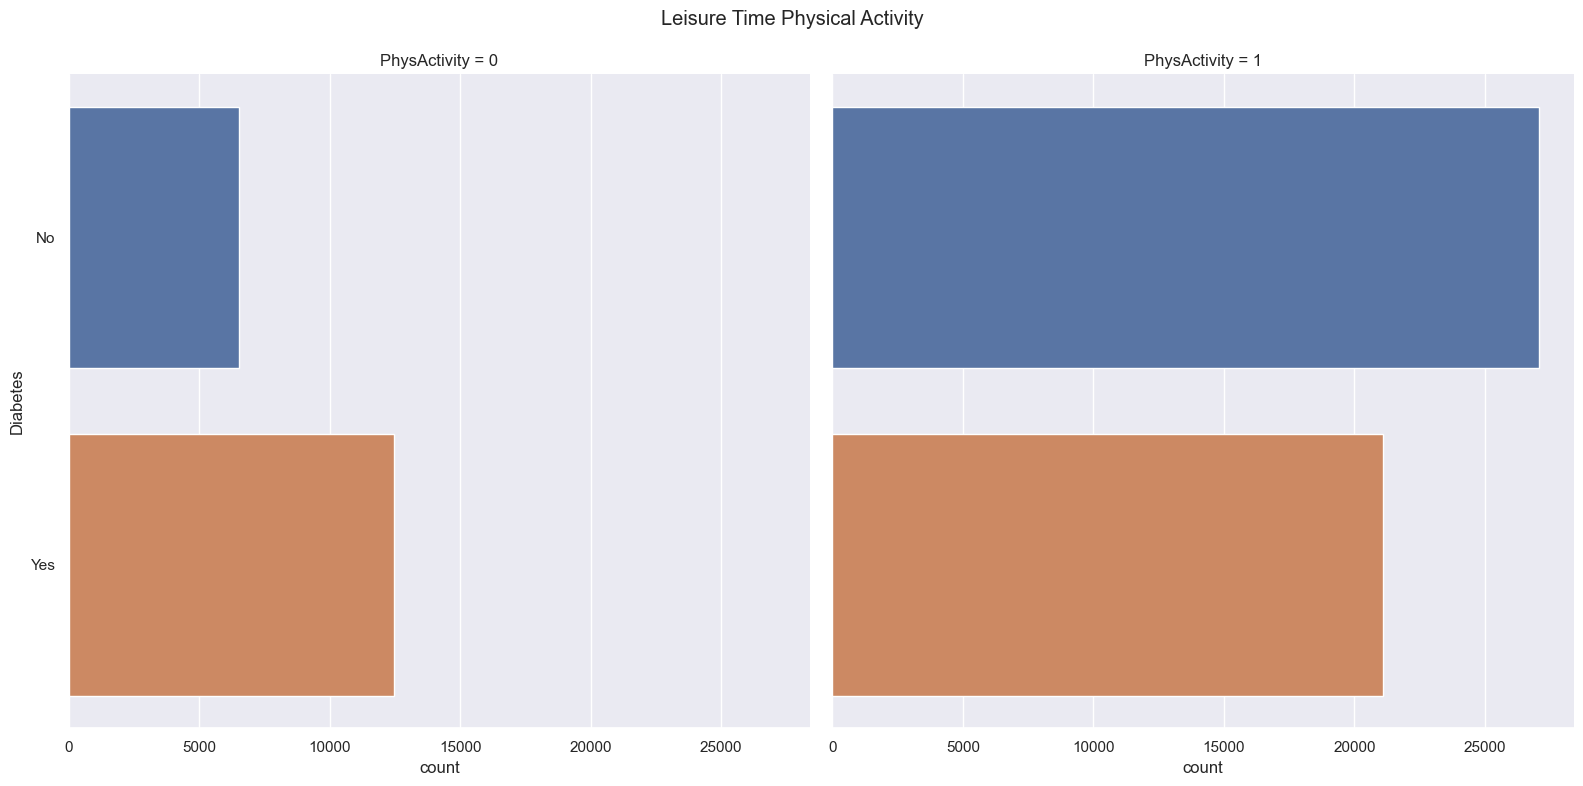

In [20]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'PhysActivity', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Leisure Time Physical Activity')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `PhysActivity`. When `PhysActivity` is 0, there are more 'Yes' than 'No' for `diabetes`. But when `PhysActivity` is 1, there are more 'No' than 'Yes'. Thus, there is a strong relationship between Leisure Time Physical Activity and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Consume Fruit 1 or more per day')

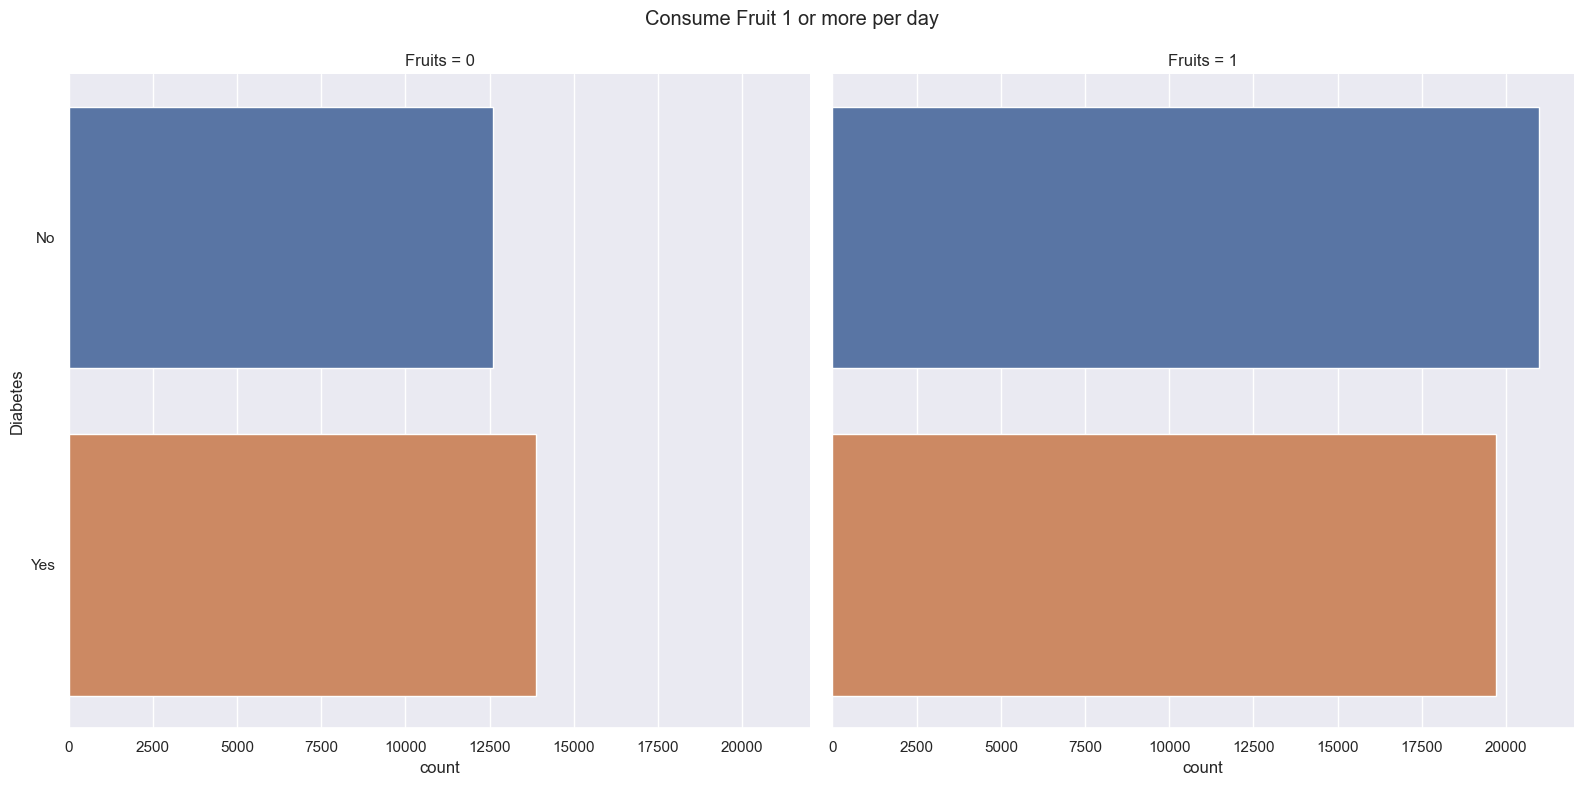

In [21]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'Fruits', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Consume Fruit 1 or more per day')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `diabetes` is similar for different categories of `Fruits`. Thus, there is no close relationship between Consuming 1 Fruit or more per day and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Consume Vegetables 1 or more per day')

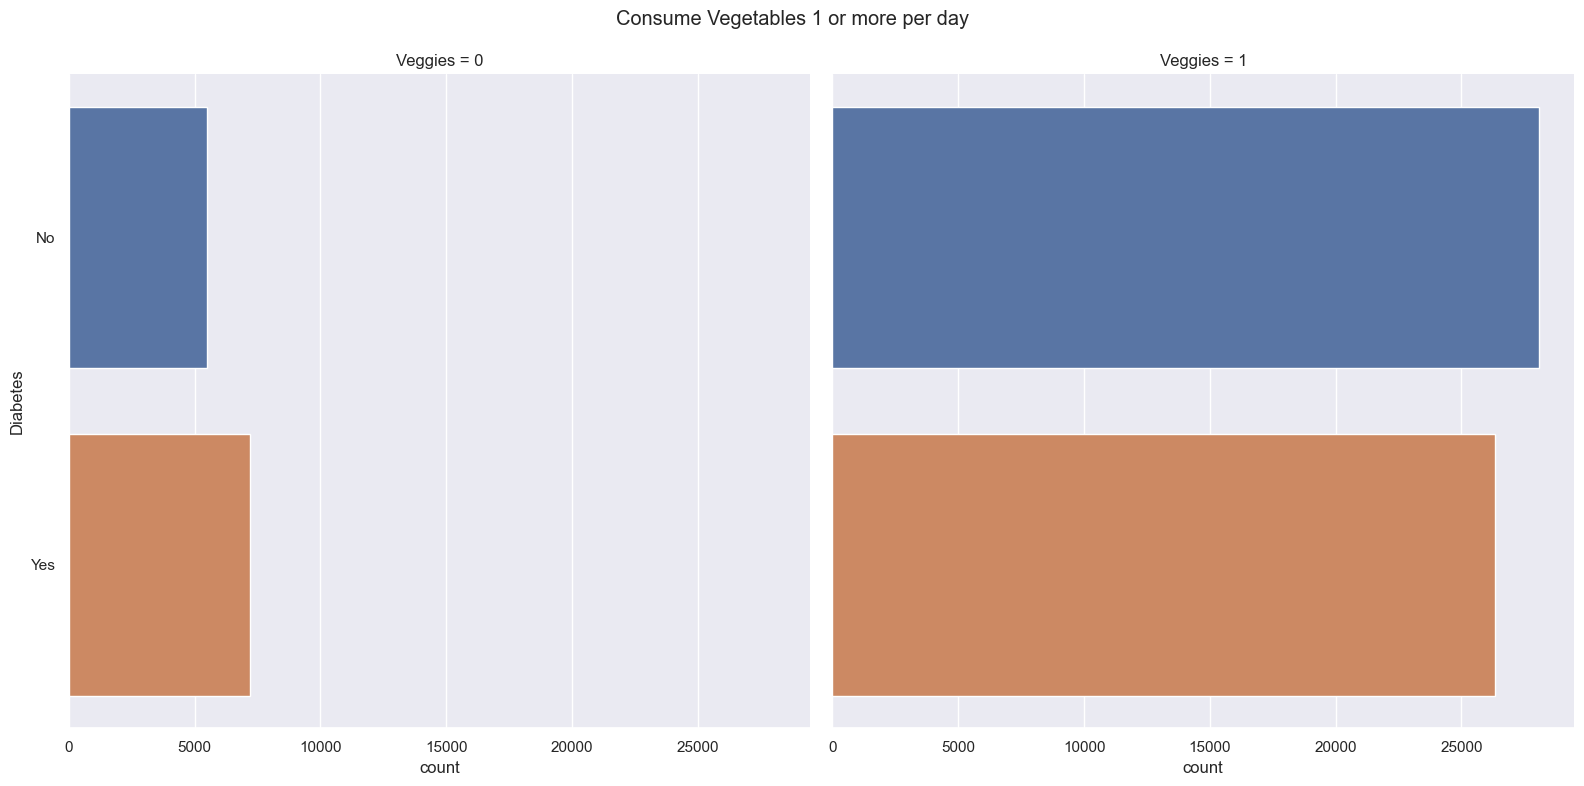

In [22]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'Veggies', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Consume Vegetables 1 or more per day')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `diabetes` is similar for different categories of `Veggies`. Thus, there is no close relationship between Consuming 1 Vegetable or more per day and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Heavy Alcohol Consumption')

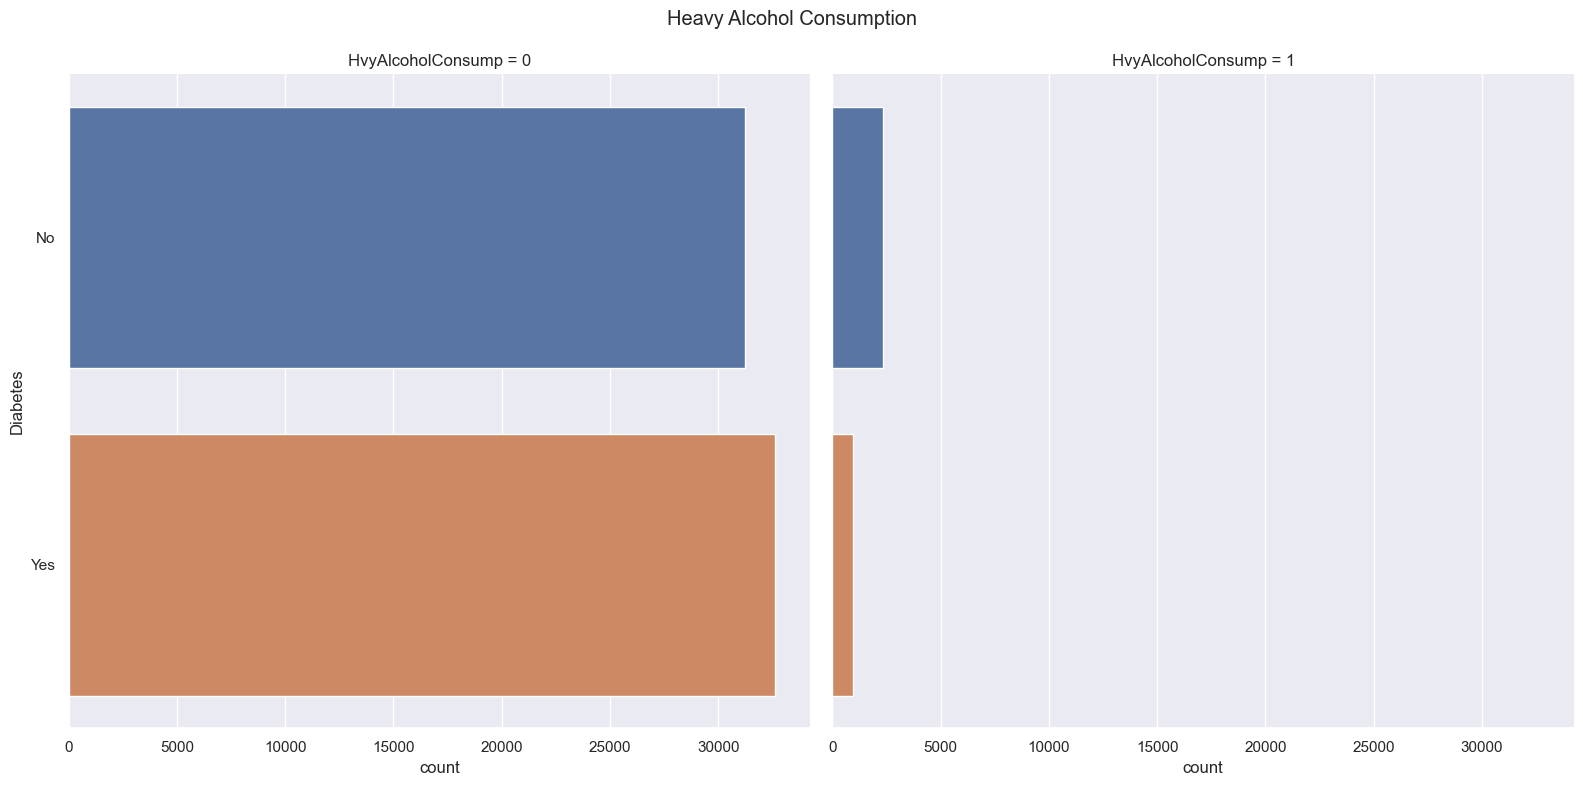

In [23]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'HvyAlcoholConsump', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Heavy Alcohol Consumption')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `diabetes` is similar for different categories of `HvyAlcoholConsump`. Thus, there is no close relationship between Heavy Alcohol Consumption and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Have any health insurance')

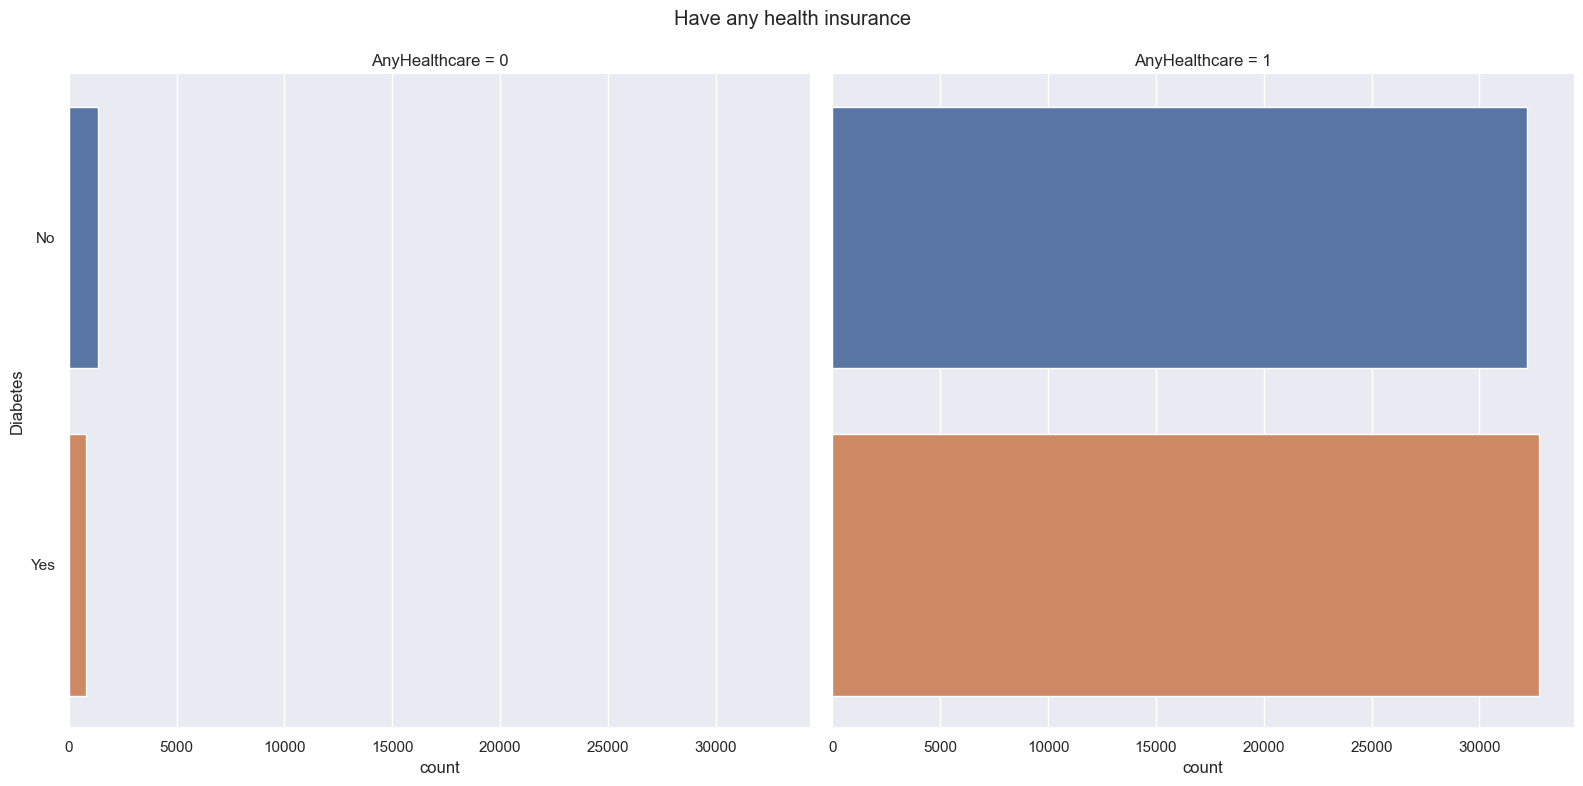

In [24]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'AnyHealthcare', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Have any health insurance')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `diabetes` is similar for different categories of `AnyHealthcare`. Thus, there is no close relationship between Having health insurance and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Could Not Afford To See Doctor')

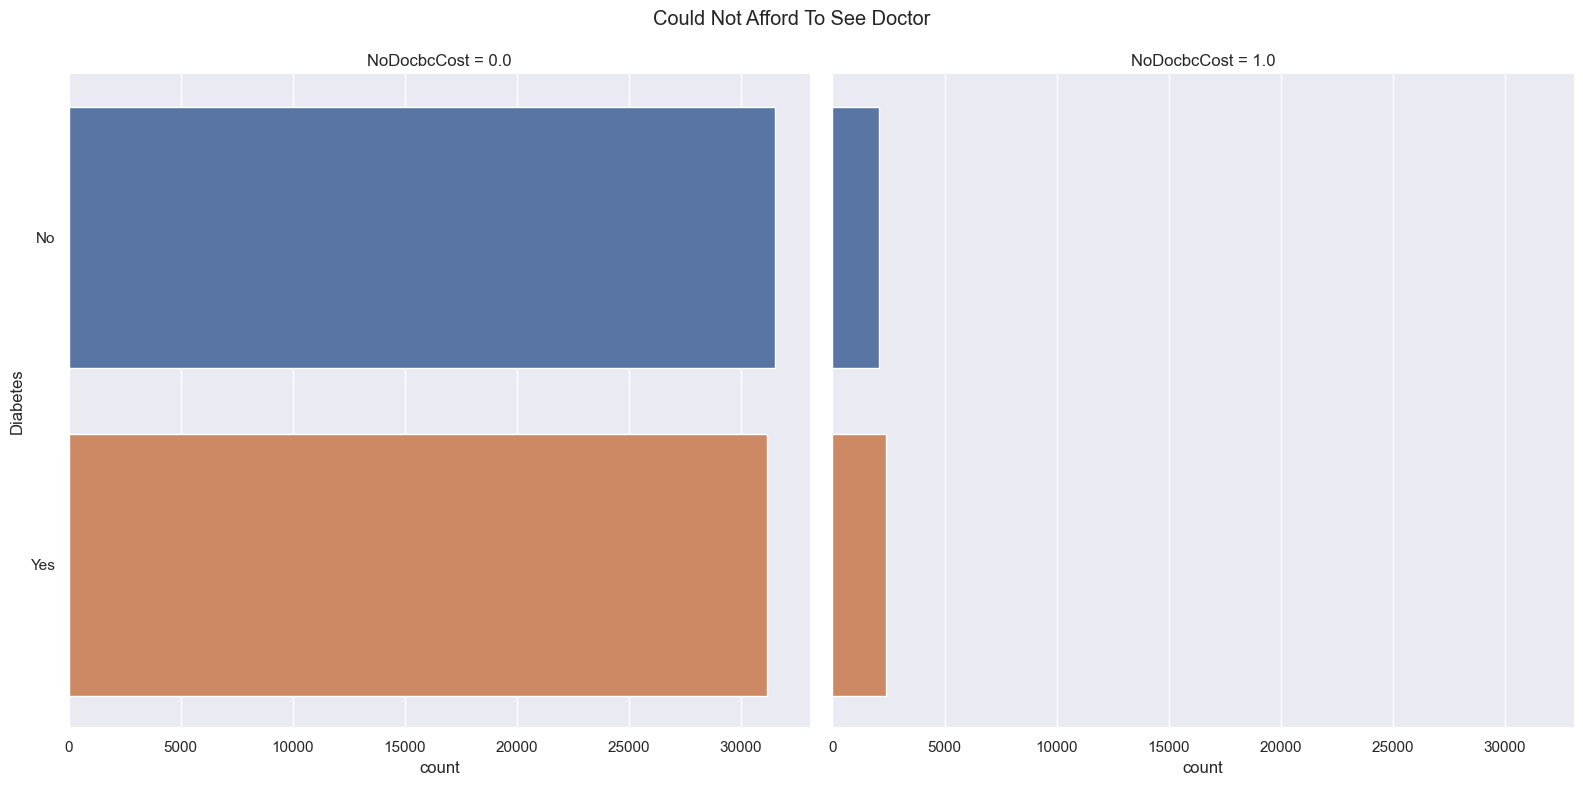

In [25]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'NoDocbcCost', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Could Not Afford To See Doctor')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `diabetes` is similar for different categories of `NoDocbcCost`. Thus, there is no close relationship between Not being able to Afford To See a Doctor and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'General health status')

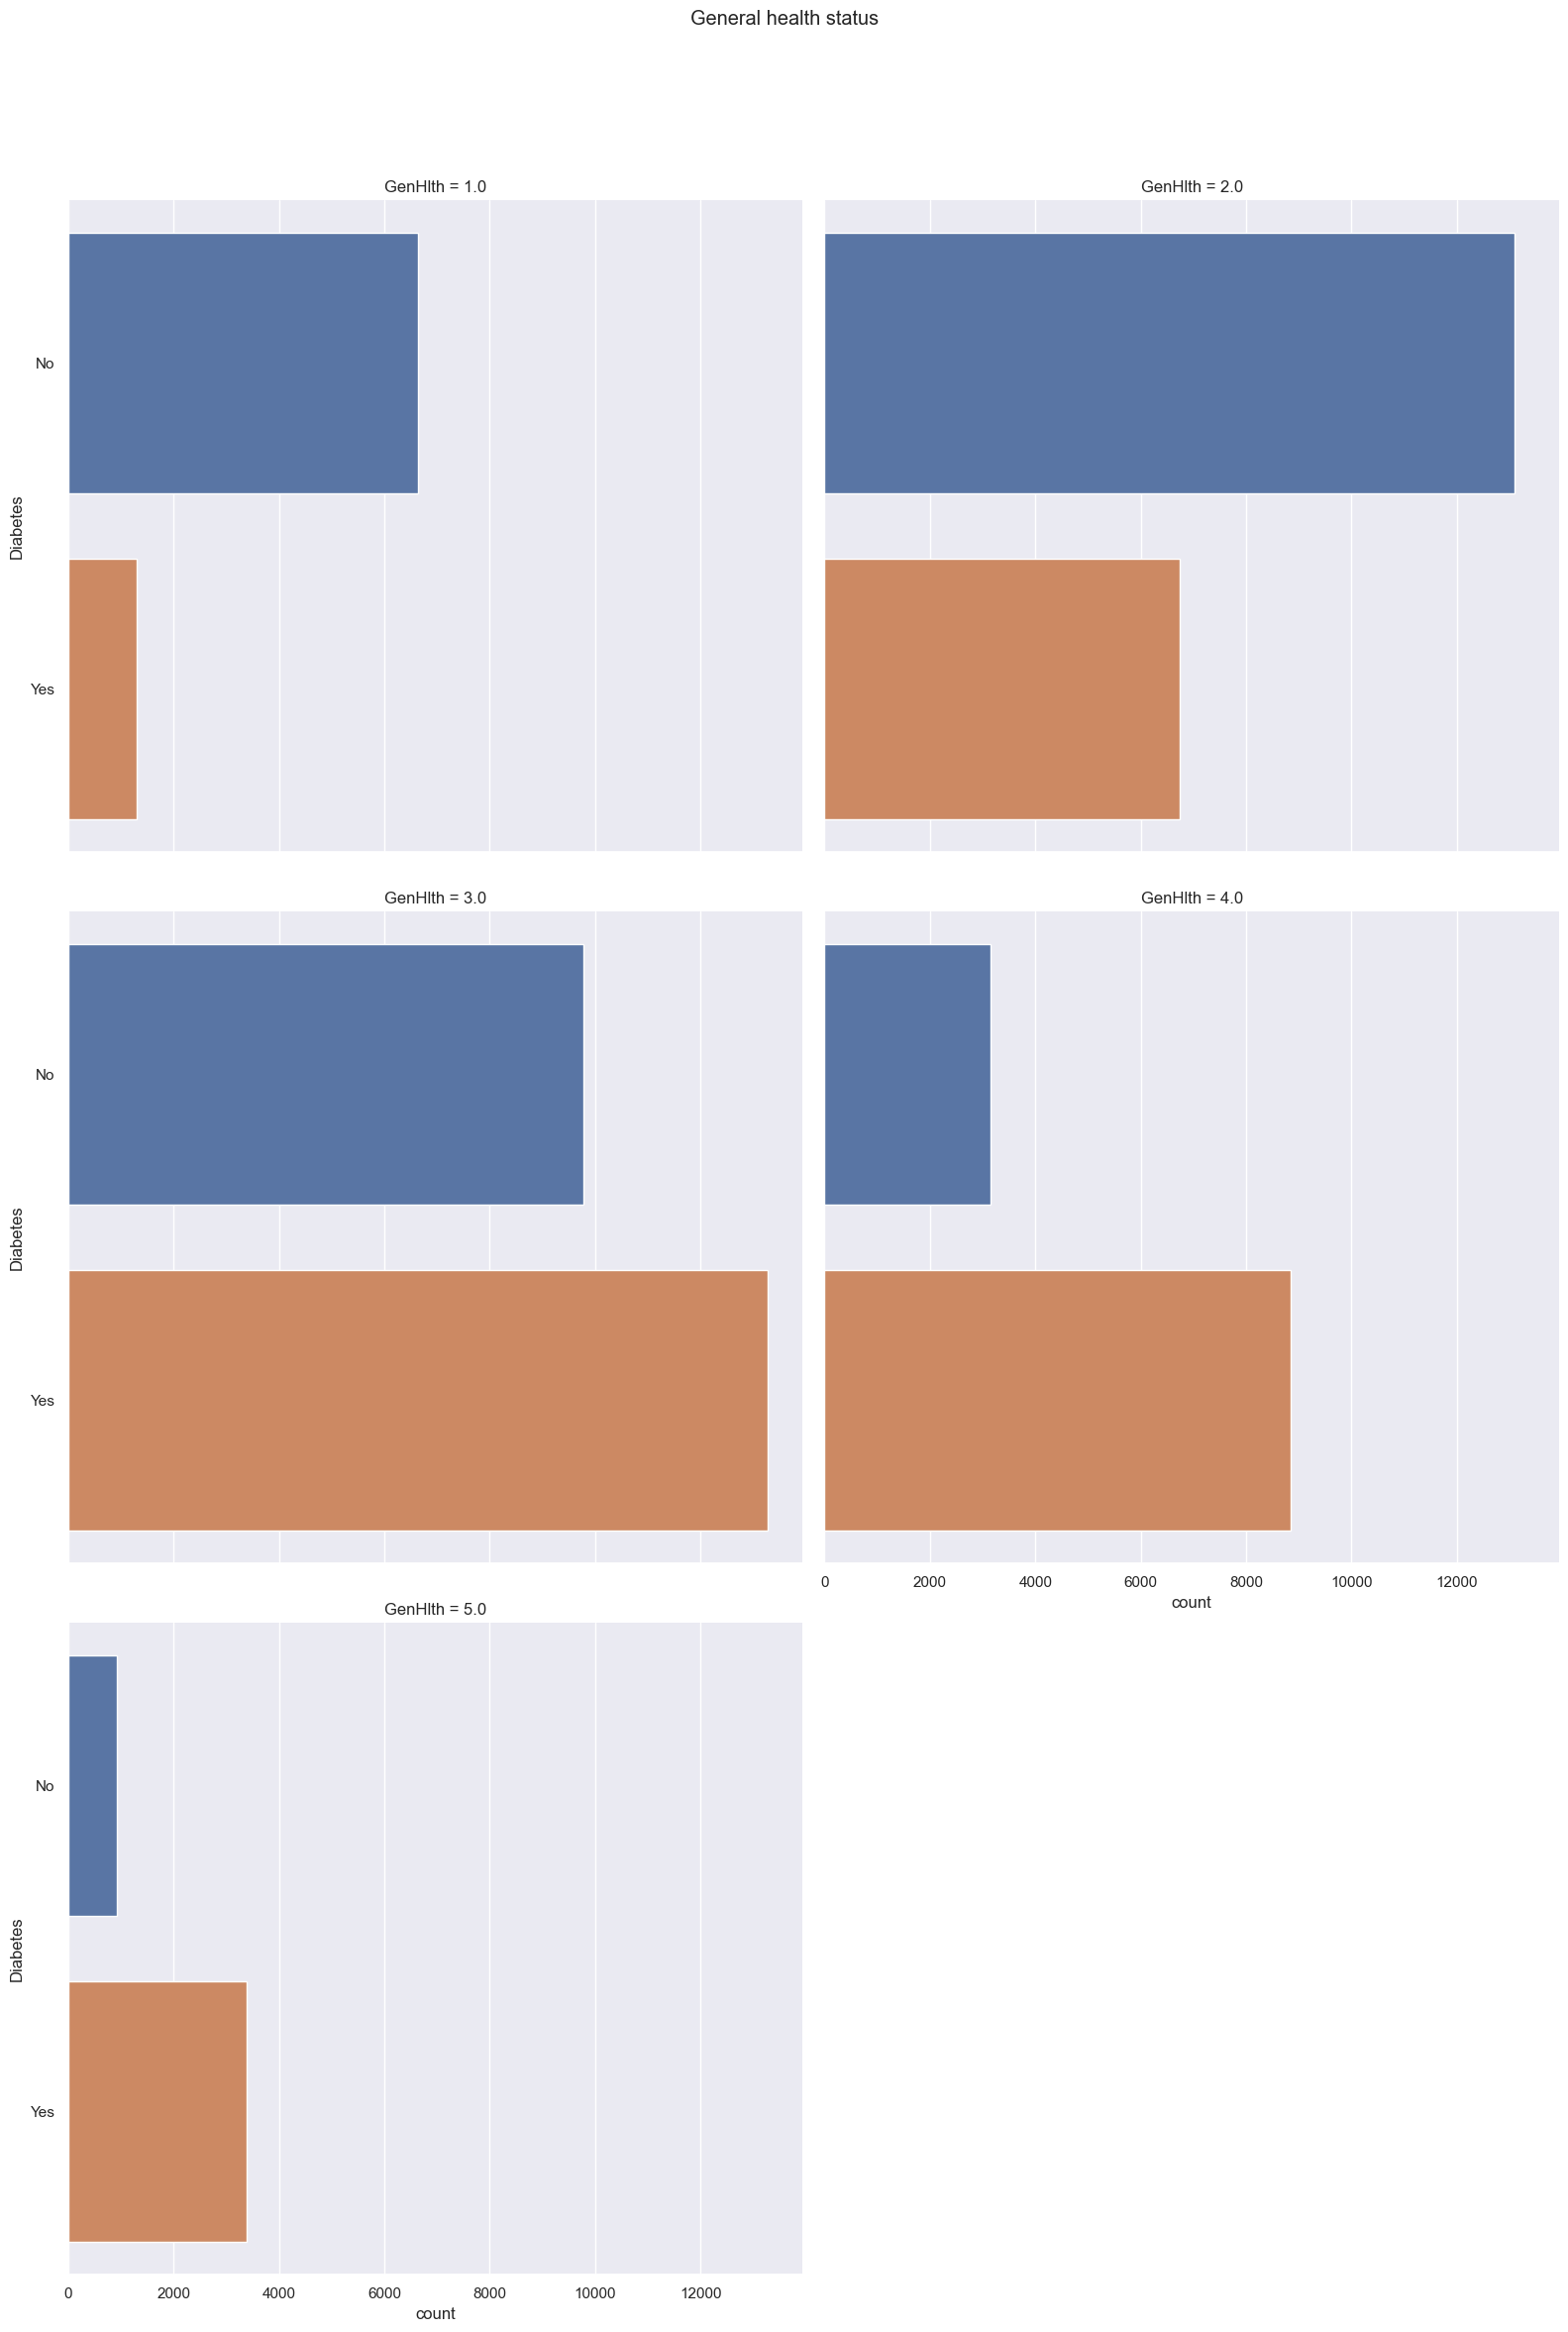

In [26]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'GenHlth', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('General health status')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `GenHlth`. When `GenHlth` indicates higher health status, there are significantly more 'Yes' than 'No' for `diabetes`. But when `GenHlth` indicates lower education, there are significantly more 'No' than 'Yes'. Thus, there is a strong relationship between General health status and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Difficulty walking or climbing stairs')

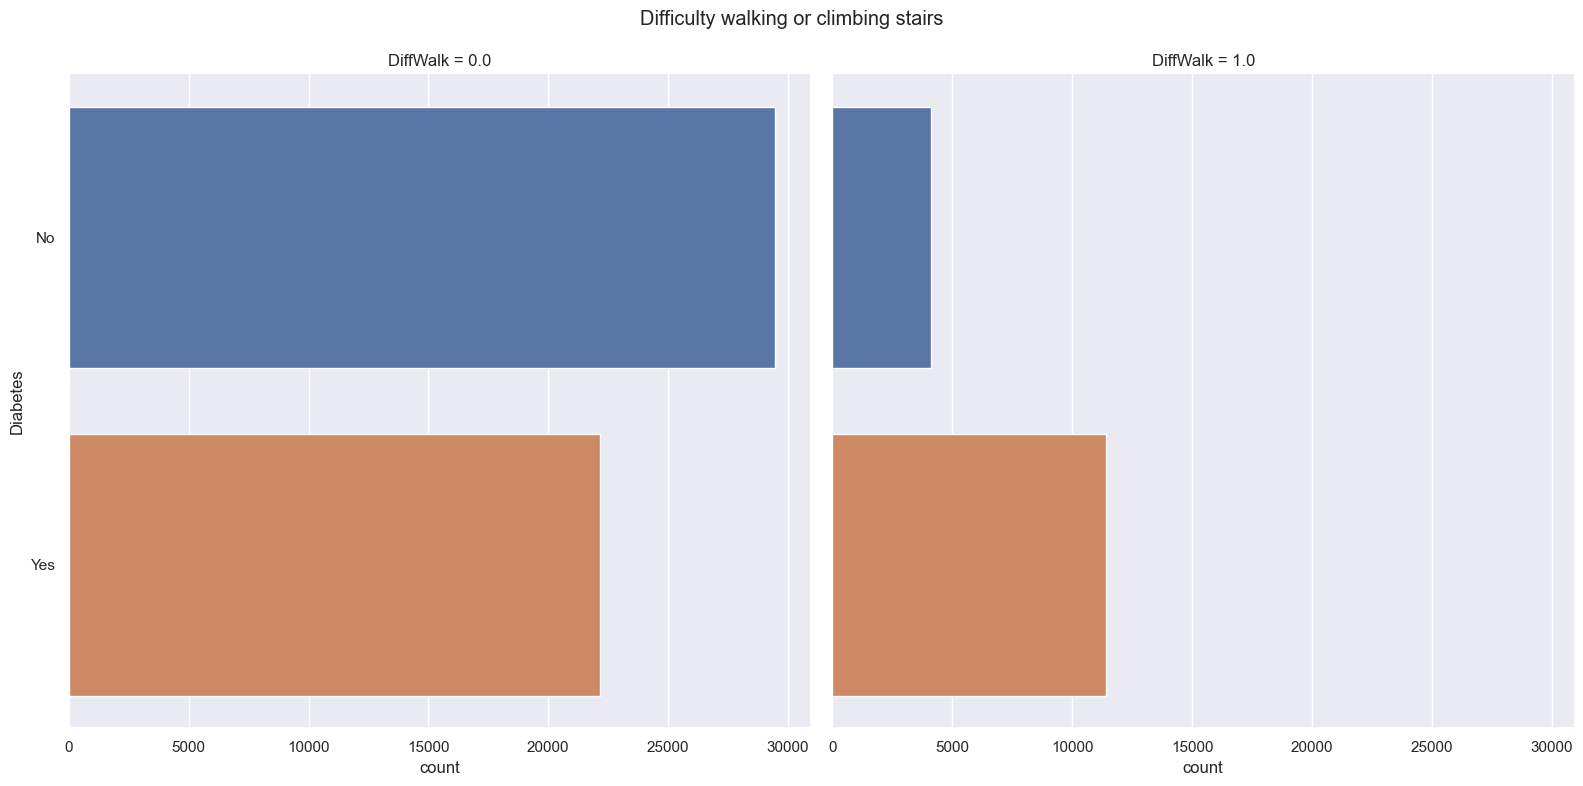

In [27]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'DiffWalk', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Difficulty walking or climbing stairs')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `DiffWalk`. When `DiffWalk` is 1, there are more 'Yes' than 'No' for `diabetes`. But when `DiffWalk` is 0, there are more 'No' than 'Yes'. Thus, there is a strong relationship between Difficulty walking or climbing stairs and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Gender')

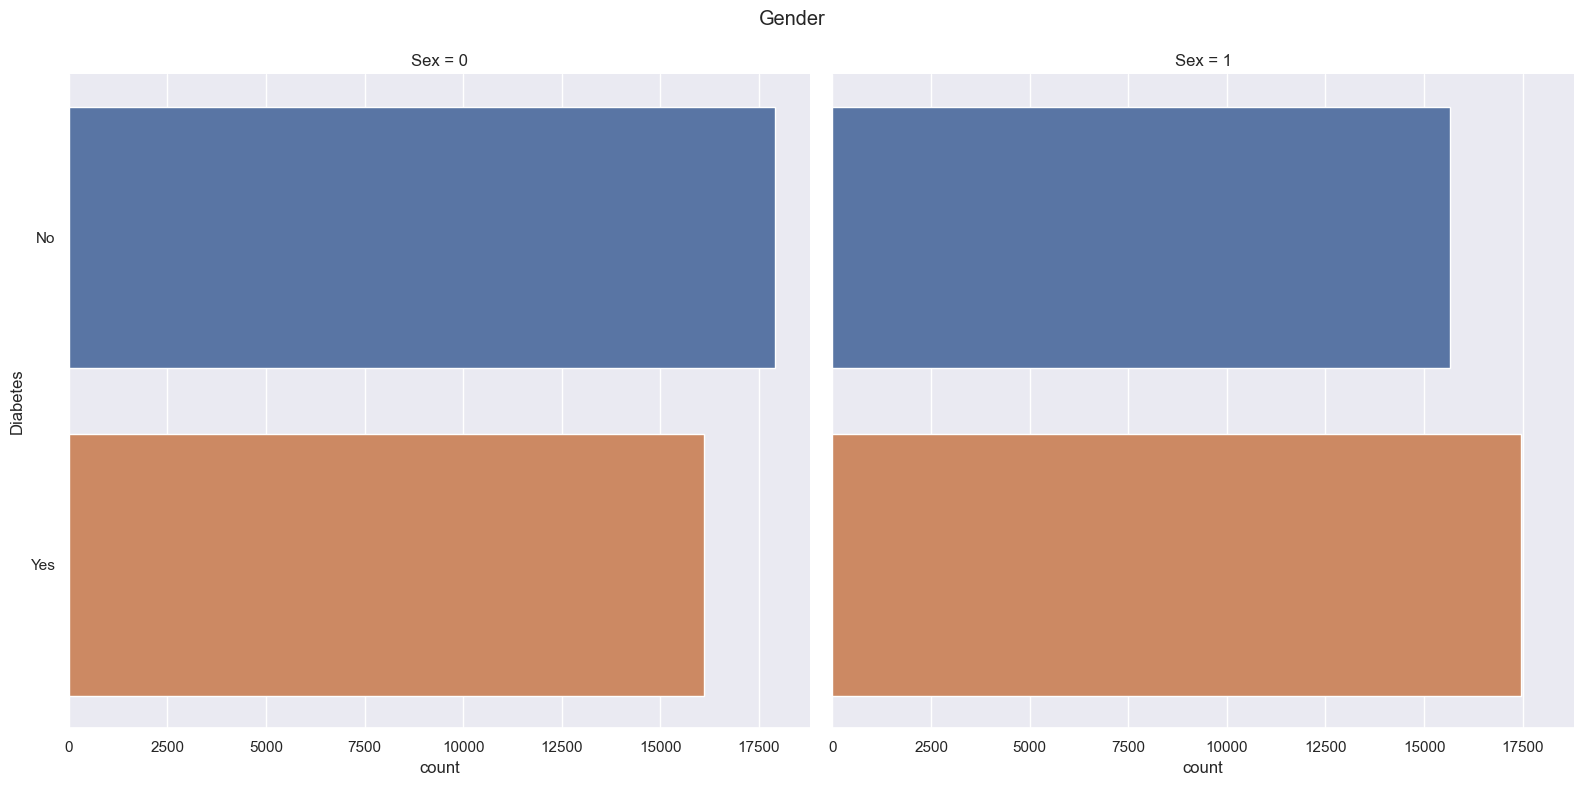

In [28]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'Sex', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Gender')

**Interpretation of the Plot**</br>
From the catplot, the distribution of `diabetes` is similar for different categories of `Sex`. Thus, there is no close relationship between gender and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Age group (5-year intervals)')

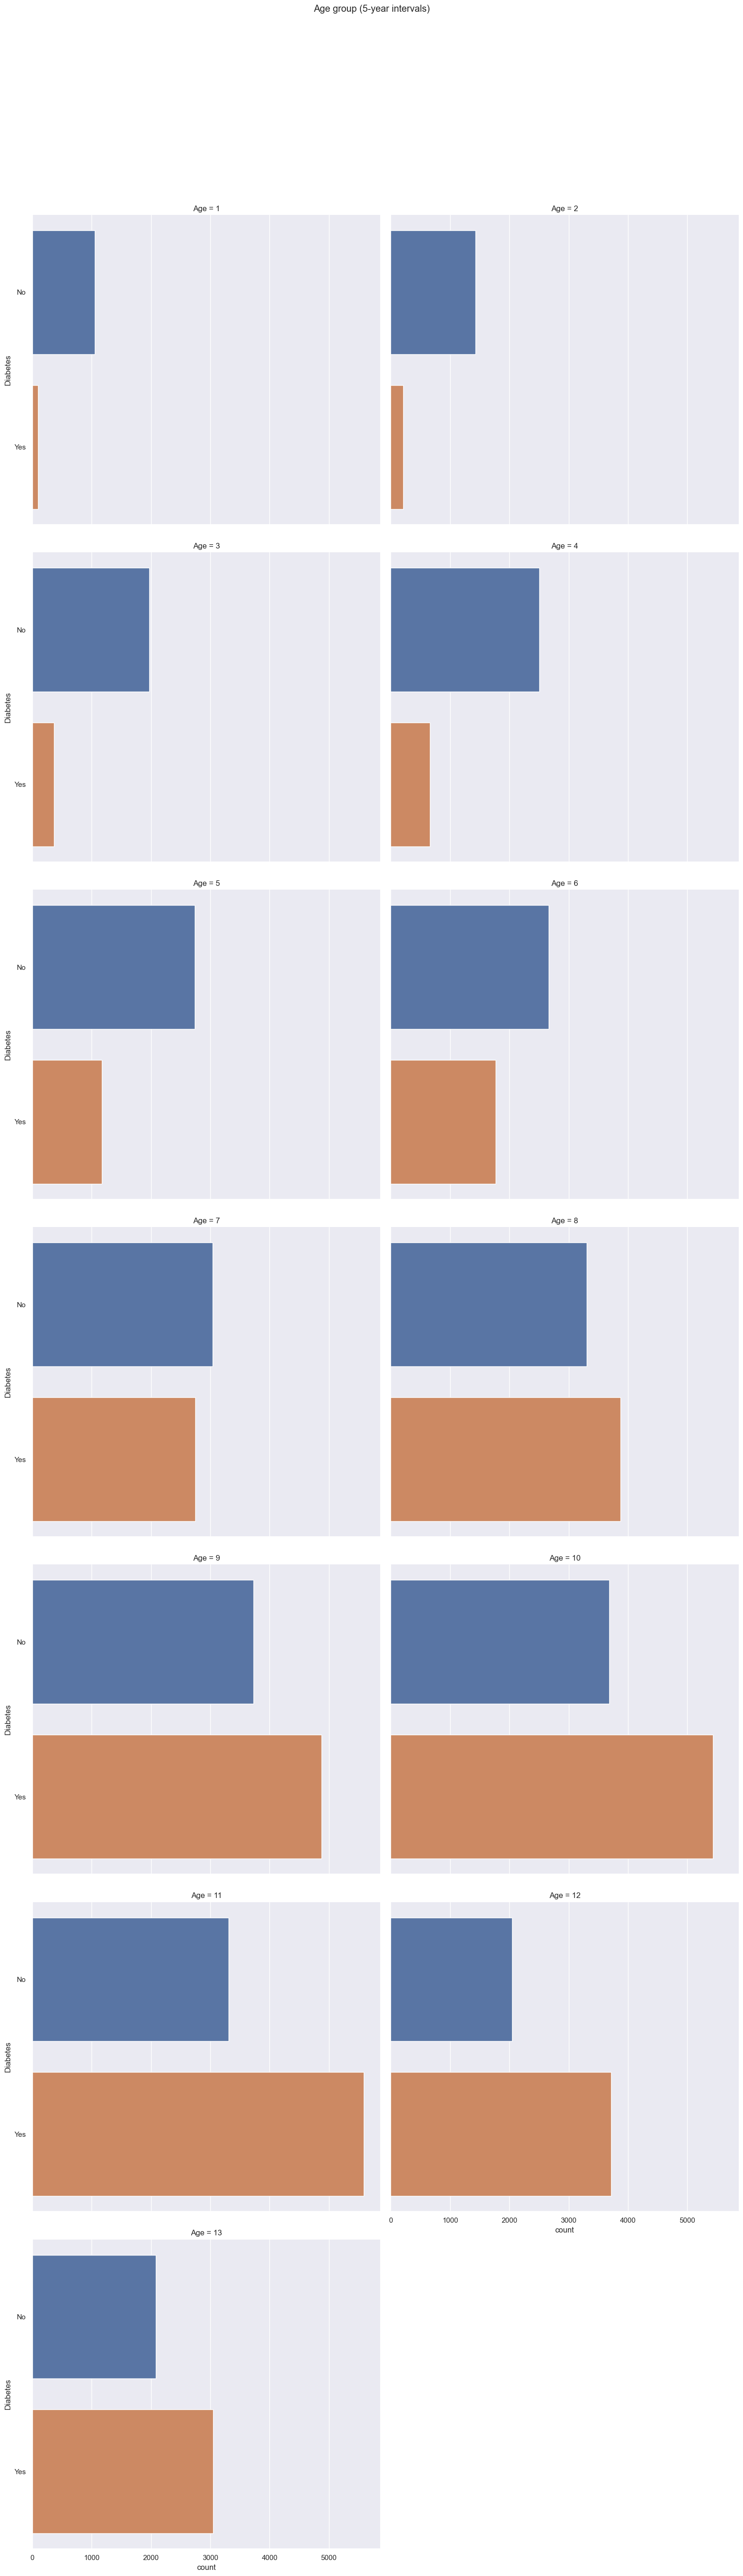

In [32]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'Age', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Age group (5-year intervals)')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `Age`. When `Age` indicates a higher age group, there are significantly more 'Yes' than 'No' for `diabetes`. But when `Age` indicates a lower age group, there are significantly more 'No' than 'Yes'. Thus, there is a strong relationship between Age groups and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Highest level of education attained')

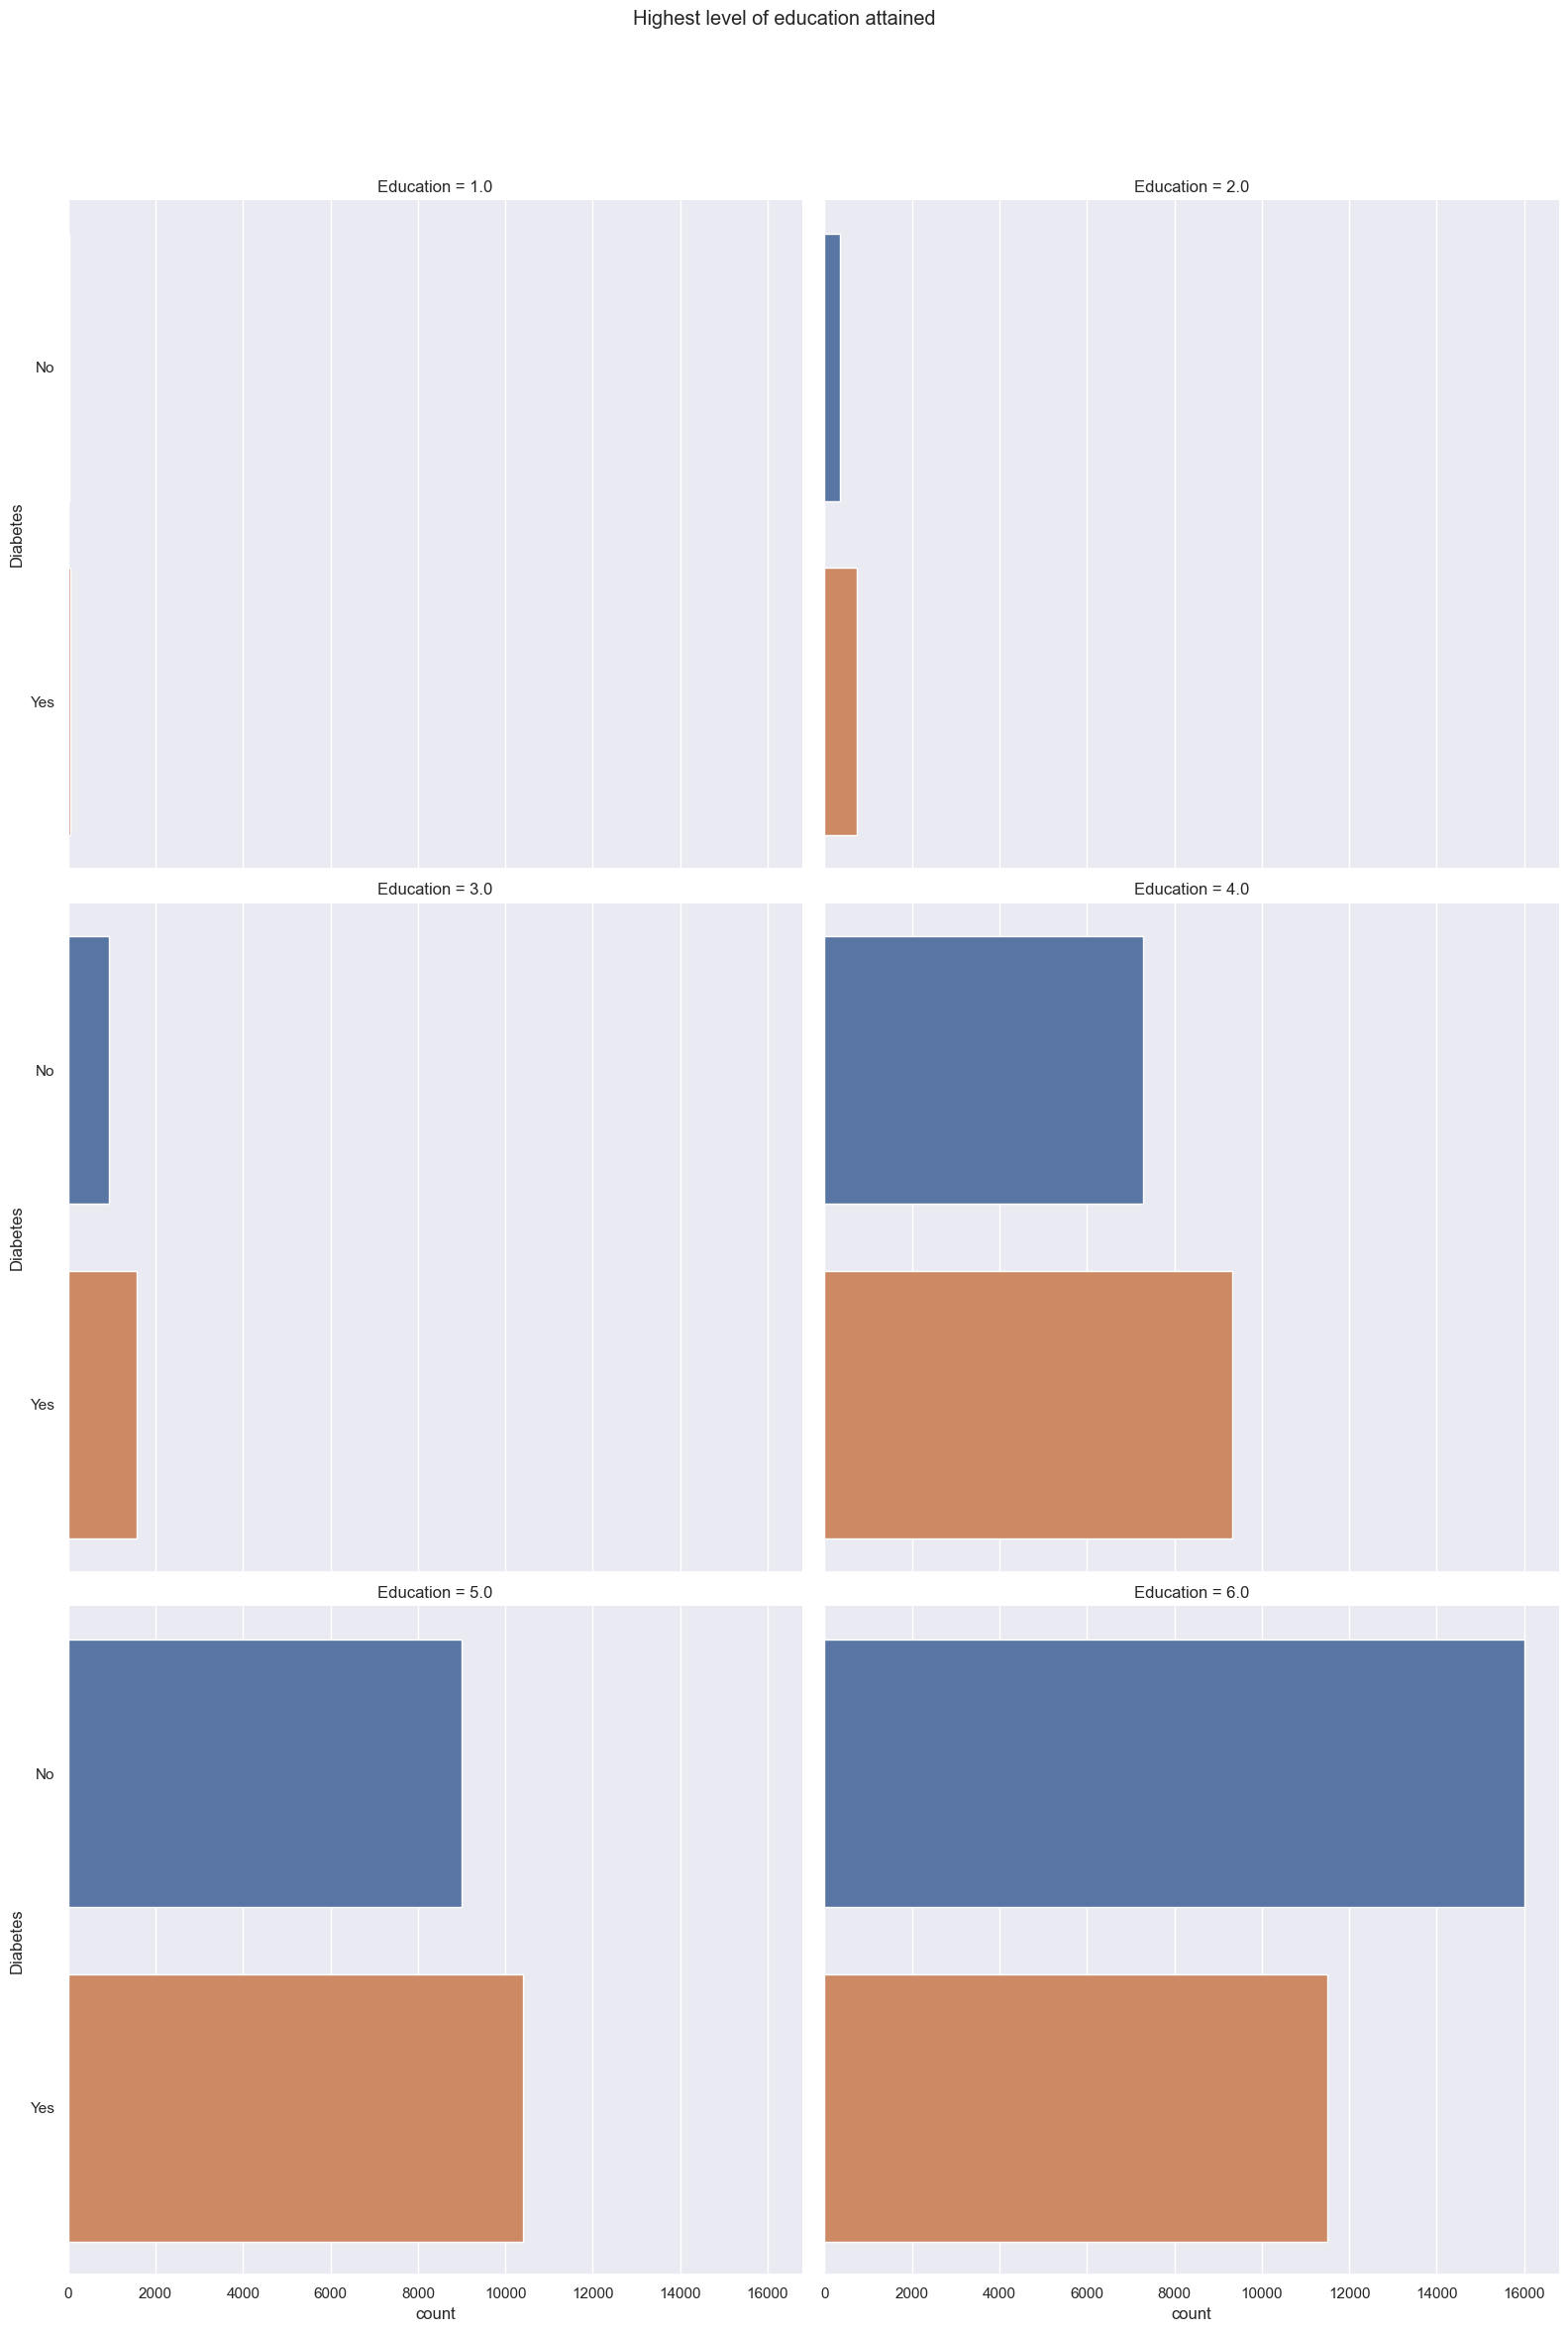

In [33]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'Education', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Highest level of education attained')

**Interpretation of the Plot**</br>
From the catplot, it is evident that there is no clear pattern in the distribution of `diabetes` for different categories of `Education`. Thus, there is no close relationship between Highest level of education attained and diabetes.

C:\Users\Kieron\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Family income (11 categories)')

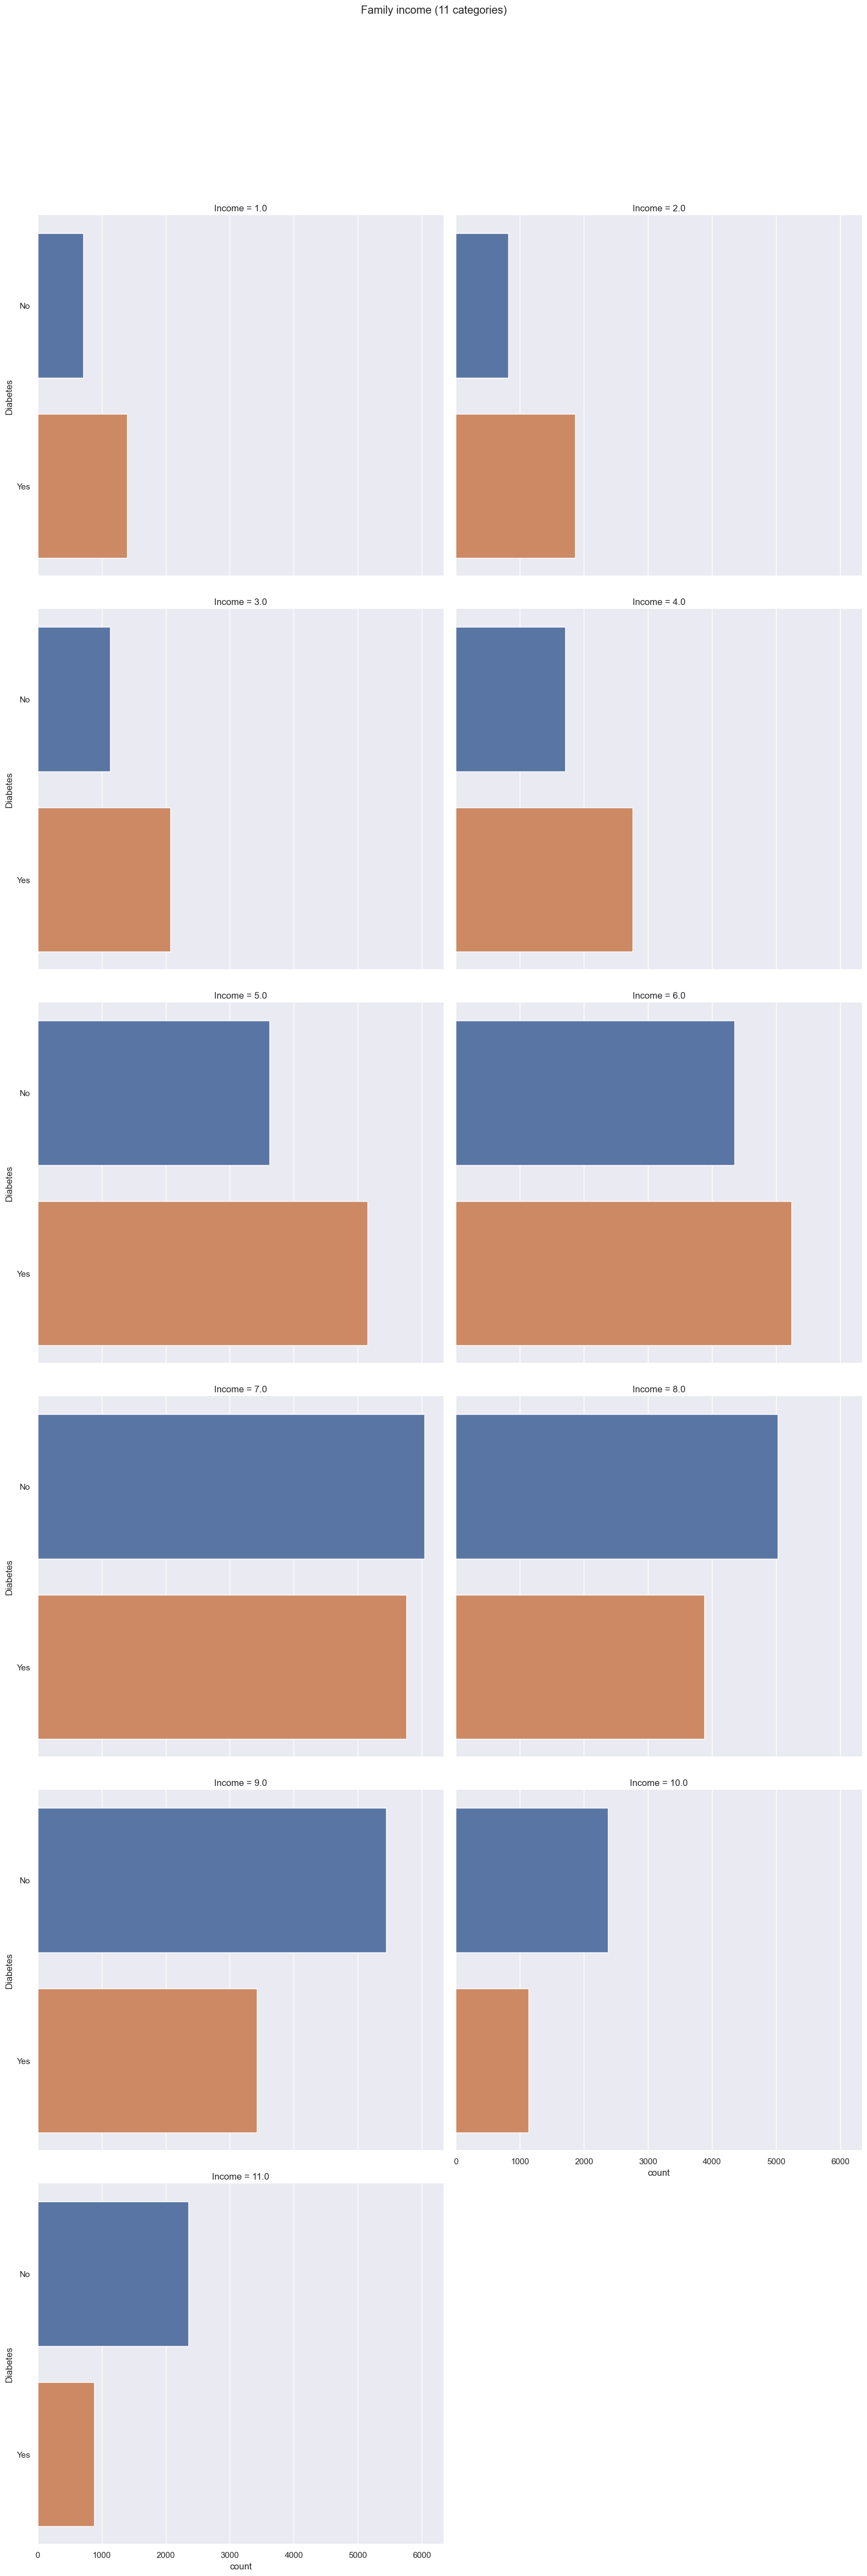

In [31]:
catplot = sb.catplot(y = 'Diabetes', data = diabetes, col = 'Income', kind = 'count', col_wrap = 2, height = 8)
catplot.fig.subplots_adjust(top=0.9)
catplot.fig.suptitle('Family income (11 categories)')

**Interpretation of the Plot**</br>
From the catplot, it is evident that the distribution of `diabetes` is different for different categories of `Income`. When `Income` indicates a lower income bracket, there are more 'Yes' than 'No' for `diabetes`. But when `Income` indicates a higher income bracket, there are more 'No' than 'Yes'. Thus, there is a strong relationship between family income and diabetes.

#### Summary of Findings
Based on the boxplots, the following categorical variables are identified to have close relationship with diabetes:
1. `HighBP`
2. `HighChol`
3. `Smoker`
4. `HeartDiseaseorAttack`
5. `PhysActivity`
6. `GenHlth`
7. `DiffWalk`
8. `Age`
9. `Income`

Thus, they will be used as predictor variables for our machine learning models.